<b><font size="6"> Data Mining Project - Group 40 2025/2026 </font></b><br><br>
<i> <font size="4"> Amazing International Airlines Inc. (AIAI)</font></i>

`Group XX`

20250405 Ana Macedo <br>
20250453 Lourenço Silva <br>
20250380 Maria Fonseca <br>

# Import Libraries 

In this section, we import the essential Python libraries that will support data processing, visualization, and analysis throughout the project. Each library provides specific functionality that helps streamline the workflow.

In [147]:
import sqlite3
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil

# To show all columns in the dataframe
!pip install tabulate
import itertools
from itertools import zip_longest
from tabulate import tabulate

from ydata_profiling import ProfileReport

# for better resolution plots
%config InlineBackend.figure_format = 'retina'

#o svg consegue ampliar infinitamente os gráficos sem perder qualidade mas às vezes é mais lento 
#por isso agora usamos retina

np.random.seed(40311)
sns.set()

# Loading the Data

In this section, we load the datasets from CSV files using commas as column separators and set the unique customer identifier as the index for both tables. This step ensures that the data is properly structured, accessible, and ready for further exploration and analysis.

In [148]:
flightsDB = pd.read_csv('data/DM_AIAI_FlightsDB.csv', sep = ",", index_col= "Loyalty#")
customerDB = pd.read_csv('data/DM_AIAI_CustomerDB.csv', sep = ",", index_col= "Loyalty#")
metaData = pd.read_csv('data/DM_AIAI_Metadata.csv', sep = ";", header= None)

Remove the 'Unnamed' column referring to a sequential numbering of the rows, as we set the column "Loyalty#" as the index

In [149]:
customerDB = customerDB.iloc[:, 1:]
customerDB

First Name    Last Name        Customer Name Country  \
Loyalty#                                                        
480934      Cecilia  Householder  Cecilia Householder  Canada   
549612        Dayle        Menez          Dayle Menez  Canada   
429460       Necole       Hannon        Necole Hannon  Canada   
608370        Queen        Hagee          Queen Hagee  Canada   
530508       Claire      Latting       Claire Latting  Canada   
...             ...          ...                  ...     ...   
100012        Ethan     Thompson       Ethan Thompson  Canada   
100013        Layla        Young          Layla Young  Canada   
100014       Amelia      Bennett       Amelia Bennett  Canada   
100015     Benjamin       Wilson      Benjamin Wilson  Canada   
100016         Emma       Martin          Emma Martin  Canada   

         Province or State          City   Latitude   Longitude Postal code  \
Loyalty#                                                                      
480934             Ontario       Toronto  43.653225  -79.383186     M2Z 4K1   
549612             Alberta      Edmonton  53.544388 -113.490930     T3G 6Y6   
429460    British Columbia     Vancouver  49.282730 -123.120740     V6E 3D9   
608370             Ontario       Toronto  43.653225  -79.383186     P1W 1K4   
530508              Quebec          Hull  45.428730  -75.713364     J8Y 3Z5   
...                    ...           ...        ...         ...         ...   
100012              Quebec   Quebec City  46.759733  -71.141009     Y0C 7D6   
100013             Alberta      Edmonton  53.524829 -113.546357     L3S 9Y3   
100014       New Brunswick       Moncton  46.051866  -64.825428     G2S 2B6   
100015              Quebec   Quebec City  46.862970  -71.133444     B1Z 8T3   
100016    British Columbia  Dawson Creek  55.720562 -120.160090     M4A 1E4   

          Gender Education Location Code   Income Marital Status  \
Loyalty#                                                           
480934    female  Bachelor         Urban  70146.0        Married   
549612      male   College         Rural      0.0       Divorced   
429460      male   College         Urban      0.0         Single   
608370      male   College      Suburban      0.0         Single   
530508      male  Bachelor      Suburban  97832.0        Married   
...          ...       ...           ...      ...            ...   
100012      male  Bachelor      Suburban      NaN         Single   
100013    female  Bachelor         Rural      NaN        Married   
100014      male  Bachelor         Rural      NaN        Married   
100015    female   College         Urban      NaN        Married   
100016    female    Master      Suburban      NaN         Single   

         LoyaltyStatus EnrollmentDateOpening CancellationDate  \
Loyalty#                                                        
480934            Star             2/15/2019              NaN   
549612            Star              3/9/2019              NaN   
429460            Star             7/14/2017         1/8/2021   
608370            Star             2/17/2016              NaN   
530508            Star            10/25/2017              NaN   
...                ...                   ...              ...   
100012            Star             2/27/2019        2/27/2019   
100013            Star             9/20/2017        9/20/2017   
100014            Star            11/28/2020       11/28/2020   
100015            Star              4/9/2020         4/9/2020   
100016            Star             7/21/2020        7/21/2020   

          Customer Lifetime Value  EnrollmentType  
Loyalty#                                           
480934                    3839.14        Standard  
549612                    3839.61        Standard  
429460                    3839.75        Standard  
608370                    3839.75        Standard  
530508                    3842.79  2021 Promotion  
...                           ...       

# Metadata

In this section, we provide a detailed description of the variables contained in both datasets, FlightsDB and CustomerDB. Understanding the meaning and structure of each attribute is essential for interpreting the data correctly and guiding subsequent analytical steps.

**FlightsDB Database Variable Description**
- **Loyalty#:**	Unique customer identifier linking to CustomerDB
- **Year:**	Year of flight activity record
- **Month:**	Month of flight activity record (1-12)
- **YearMonthDate:**	First day of the month for the activity period
- **NumFlights:**	Total number of flights taken by customer in the month
- **NumFlightsWithCompanions:**	Number of flights where customer traveled with companions
- **DistanceKM:**	Total distance traveled in kilometers for the month
- **PointsAccumulated:**	Loyalty points earned by customer during the month
- **PointsRedeemed:**	Loyalty points spent/redeemed by customer during the month
- **DollarCostPointsRedeemed:**	Dollar value of points redeemed during the month

**CustomerDB Database Variable Description**
- **Loyalty#:**  Unique customer identifier for loyalty program members
- **First Name:**   Customer's first name
- **Last Name:**   Customer's last name 
- **Customer Name:** Customer's full name (concatenated)
- **Country:**	Customer's country of residence
- **Province or State:**	Customer's province or state
- **City:**	Customer's city of residence
- **Latitude:**	Geographic latitude coordinate of customer location
- **Longitude:**	Geographic longitude coordinate of customer locatio
- **Postal code:**	Customer's postal/ZIP code
- **Gender:**	Customer's gender
- **Education:**	Customer's highest education level (Bachelor, College, etc.)
- **Location:** Code	Urban/Suburban/Rural classification of customer residence
- **Income:**	Customer's annual income
- **Marital Status:**	Customer's marital status (Married, Single, Divorced)
- **LoyaltyStatus:**	Current tier status in loyalty program (Star > Nova > Aurora)
- **EnrollmentDateOpening:**	Date when customer joined the loyalty program
- **CancellationDate:**	Date when customer left the program
- **Customer Lifetime:** Value	Total calculated monetary value of customer relationship
- **EnrollmentType:**	Method of joining loyalty program

# Descriptive Statistics and Visualisations (FlightsDB)

This section begins by splitting the features in groups according to their type to ensure that the most appropriate statistical methods and plots were applied.
Through this structured approach, we uncover patterns related to flight frequency, distances, and spending behavior.
These insights provide an initial understanding of travel habits and operational trends, forming a foundation for subsequent behavioral and value-based segmentation.

In [150]:
non_metric_features_FDB = ["YearMonthDate"]
metric_features_FDB = flightsDB.columns.drop(non_metric_features_FDB).to_list()
continuous_features_FDB = ["DistanceKM", "PointsAccumulated", "PointsRedeemed", "DollarCostPointsRedeemed"]

data = list(zip_longest(
    metric_features_FDB,
    non_metric_features_FDB,
    continuous_features_FDB,
    fillvalue=""
))

headers = [
    "Metric Features",
    "Non-Metric Features",
    "Continuous Features",
]

print(tabulate(data, headers=headers, tablefmt="github"))

| Metric Features          | Non-Metric Features   | Continuous Features      |
|--------------------------|-----------------------|--------------------------|
| Year                     | YearMonthDate         | DistanceKM               |
| Month                    |                       | PointsAccumulated        |
| NumFlights               |                       | PointsRedeemed           |
| NumFlightsWithCompanions |                       | DollarCostPointsRedeemed |
| DistanceKM               |                       |                          |
| PointsAccumulated        |                       |                          |
| PointsRedeemed           |                       |                          |
| DollarCostPointsRedeemed |                       |                          |


## Metric Features Visualizations (FlightsDB)

### **Histograms**

Now we analyze the distribution of several flight-related variables using histograms. This approach allows us to observe the overall shape, central tendency, and spread of each variable. We also complement the histogram with a smoothing line to better reveal the underlying distribution, minimizing binning bias. 

It is important to note that some of these variables, particularly those representing the number of flights, are stored as float values instead of integers. This issue was already identified during the exploratory data analysis (EDA) and clearly represents a data quality inconsistency, since the number of flights should always be a discrete integer variable.

Nevertheless, these variables were intentionally included in the histograms to illustrate how the data behave when treated as continuous. This choice helps visualize the overall distribution and highlight the underlying data quality issue, emphasizing the importance of proper data typing before any modeling or segmentation work.

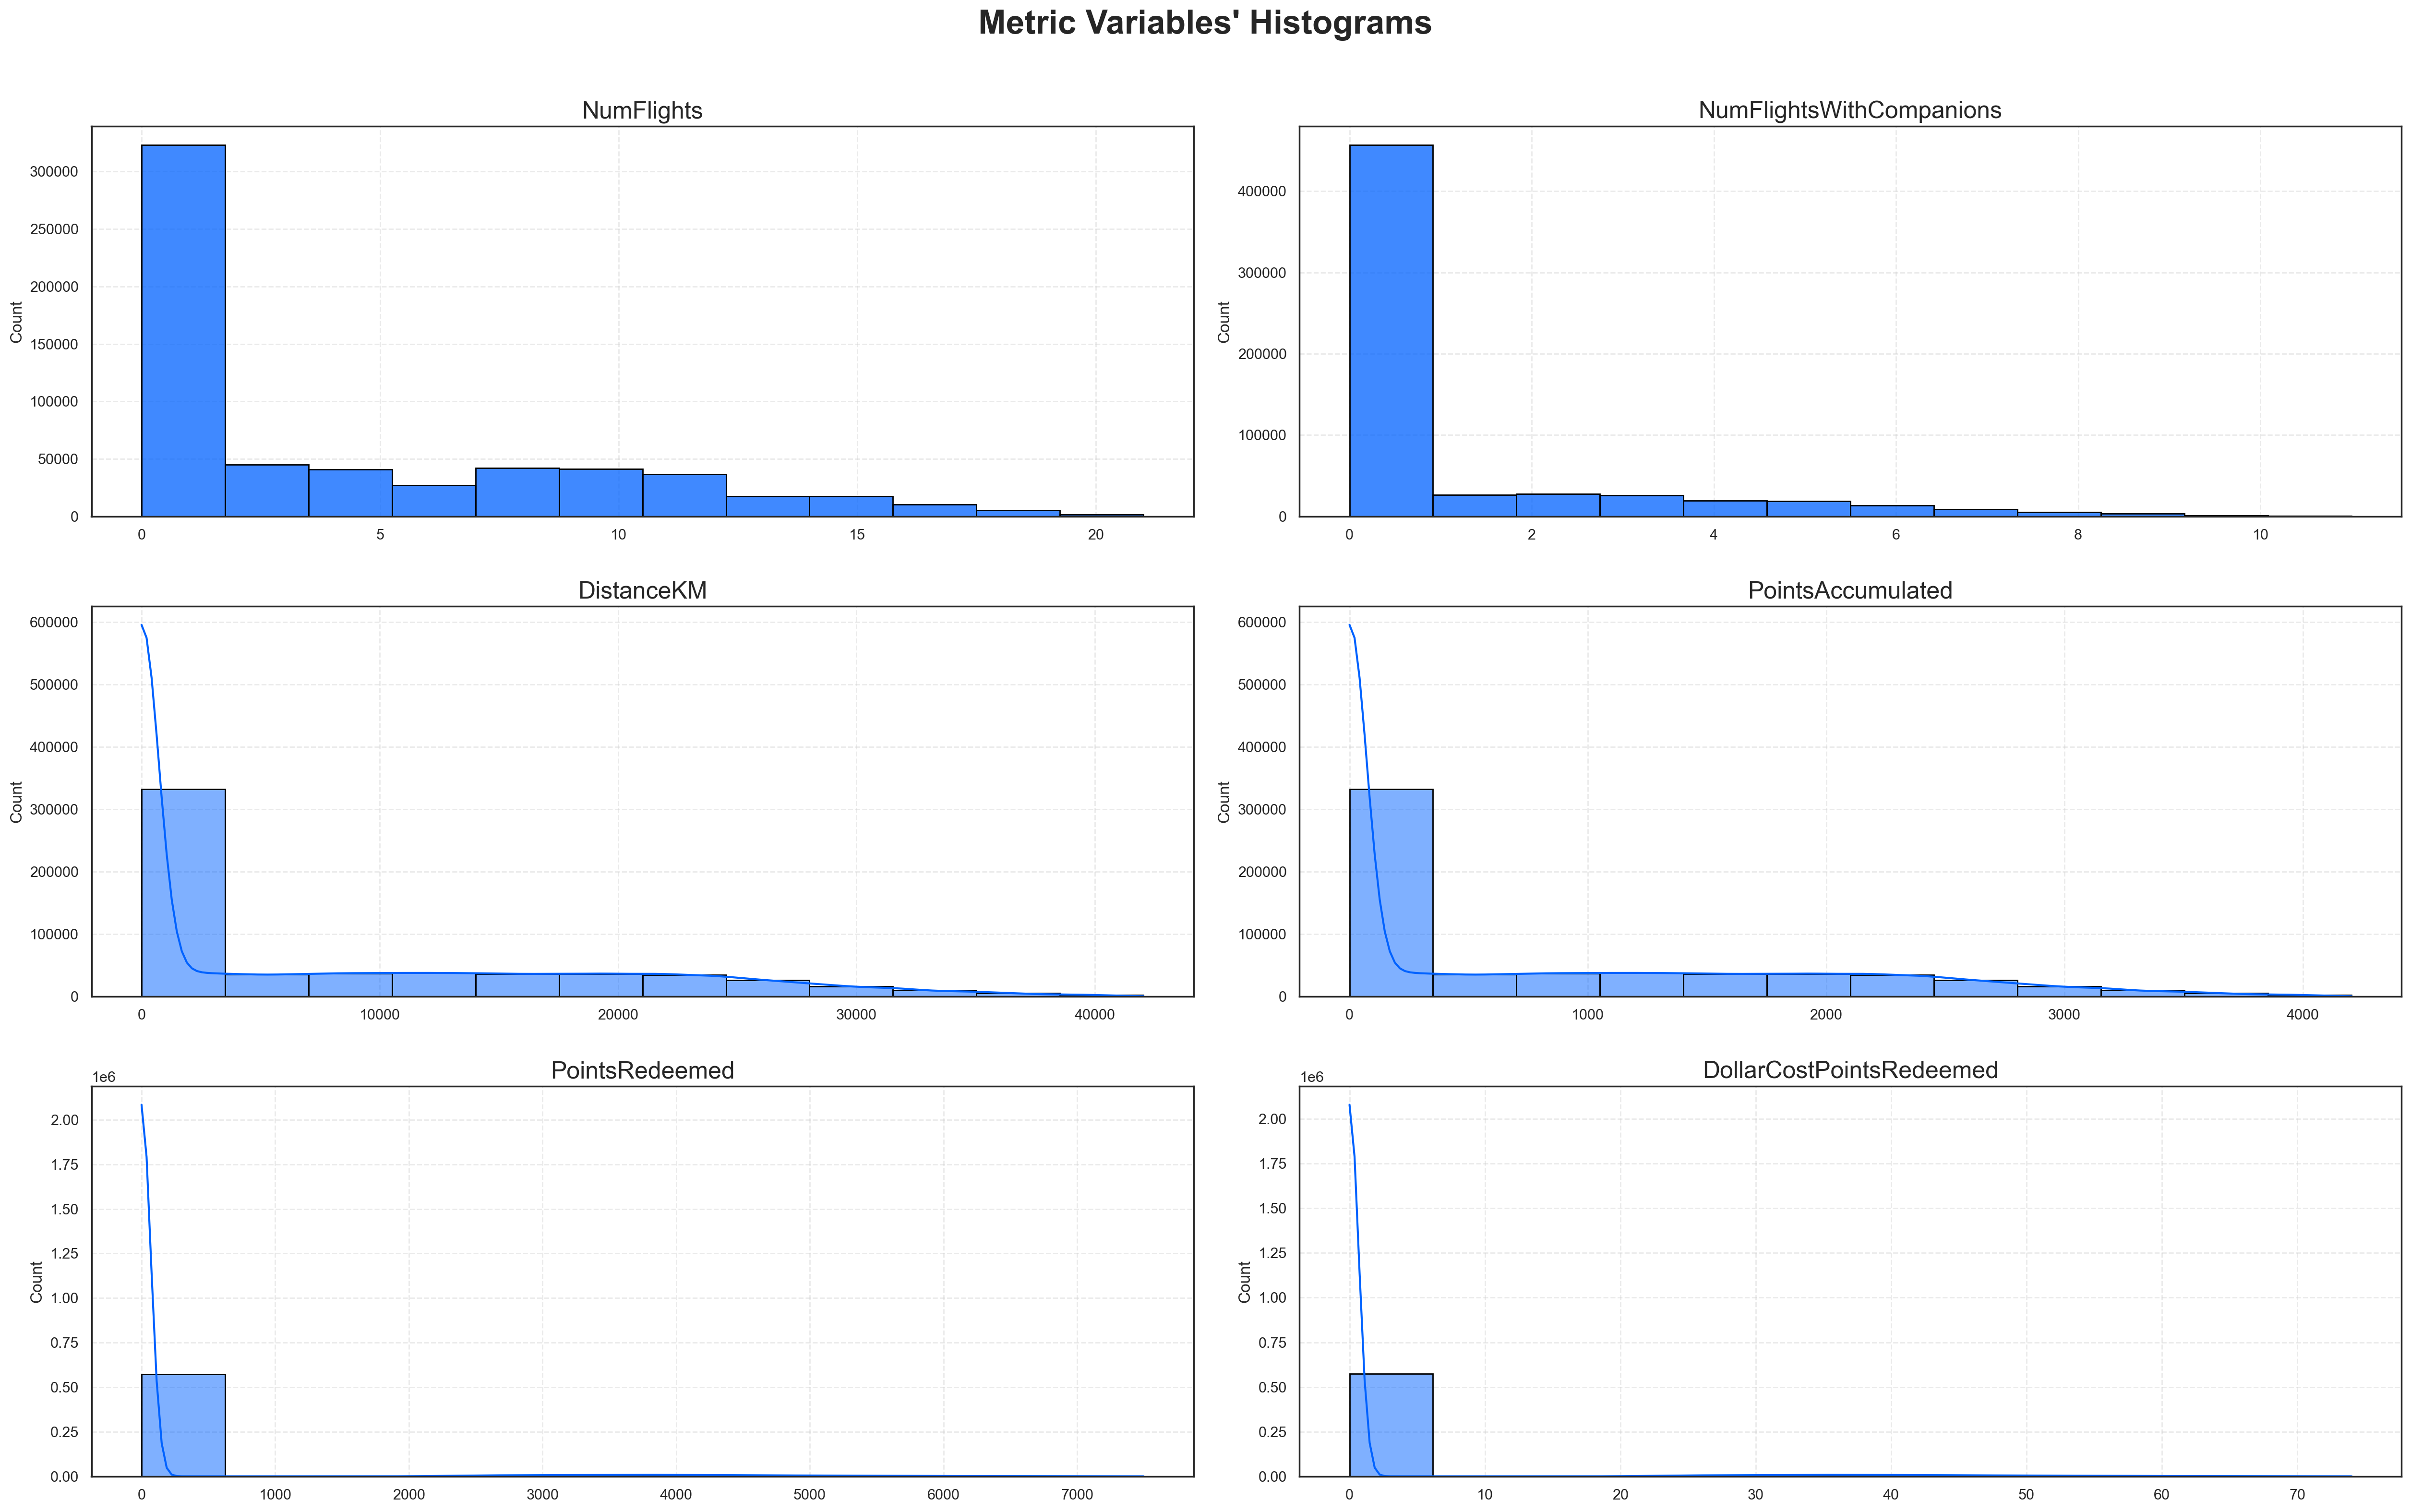

In [151]:
# Set number of rows and columns
sp_rows_FDB = 3
sp_cols_FDB = ceil(len(metric_features_FDB[2:]) / sp_rows_FDB)

# Set style
sns.set_style("white") # increase contrast

# Create figure
fig, axes = plt.subplots(sp_rows_FDB,
                         sp_cols_FDB,
                         figsize=(25, 15),
                         constrained_layout=True)

# Additional spacing between rows
fig.set_constrained_layout_pads(h_pad=.2)

# Plot data
for ax, feat in zip(axes.flatten(), metric_features_FDB[2:]): # "[2:]" to skip Year and Month features
    
    sns.histplot(flightsDB[feat],
                 bins=12,
                 kde=(feat in continuous_features_FDB), #smooth line only for continuous variables
                 ax=ax,
                 color="#0062FF",
                 edgecolor="black")
    
    ax.set_title(feat, fontsize=18)
    ax.grid(True, linestyle="--", alpha=0.4)
    ax.set_xlabel("")

# Global title
plt.suptitle("Metric Variables' Histograms",
             fontsize=25,
             fontweight="bold",
             y=1.05)

# Save figure
os.makedirs(os.path.join('..', 'figures', 'eda'), exist_ok=True)
fig.savefig(os.path.join('..', 'figures', 'eda', 'numeric_variables_histograms.png'),
            dpi=200)

# display output
plt.show()


From the histograms above we can see that:

- `Number of Flights and Flights with Companions:` Most customers make few trips (1 to 3 flights). Few customers travel frequently—they are the outliers. As said before it's possible to visualize that are some number of flights as floats what doens't make sense;
- `Distance KM:` Most flights are short-haul. There are some long-haul flights that can represent the outliers;
- `Points Accumulated:` Only a small percentage of customers accumulate many points;
- `Points Redeemed:` Almost all customers do not redeem points or redeem very few;
- `Dollar Cost Points Redeemed:` As expected, this has the same behaviour as 'Points Redeemed' because it's just the equivalent in dollars.

### **Boxplots**

This subsection presents boxplots for the continuous variables, including those representing the number of flights.
Although, as previously discussed, the flight count variables are incorrectly stored as float values instead of integers, they were intentionally kept in this analysis. The goal is to examine the presence of outliers and assess the overall dispersion of these features.
Boxplots provide an effective way to detect extreme values, which can be particularly relevant for understanding unusual travel patterns or data recording errors that may affect the later process.

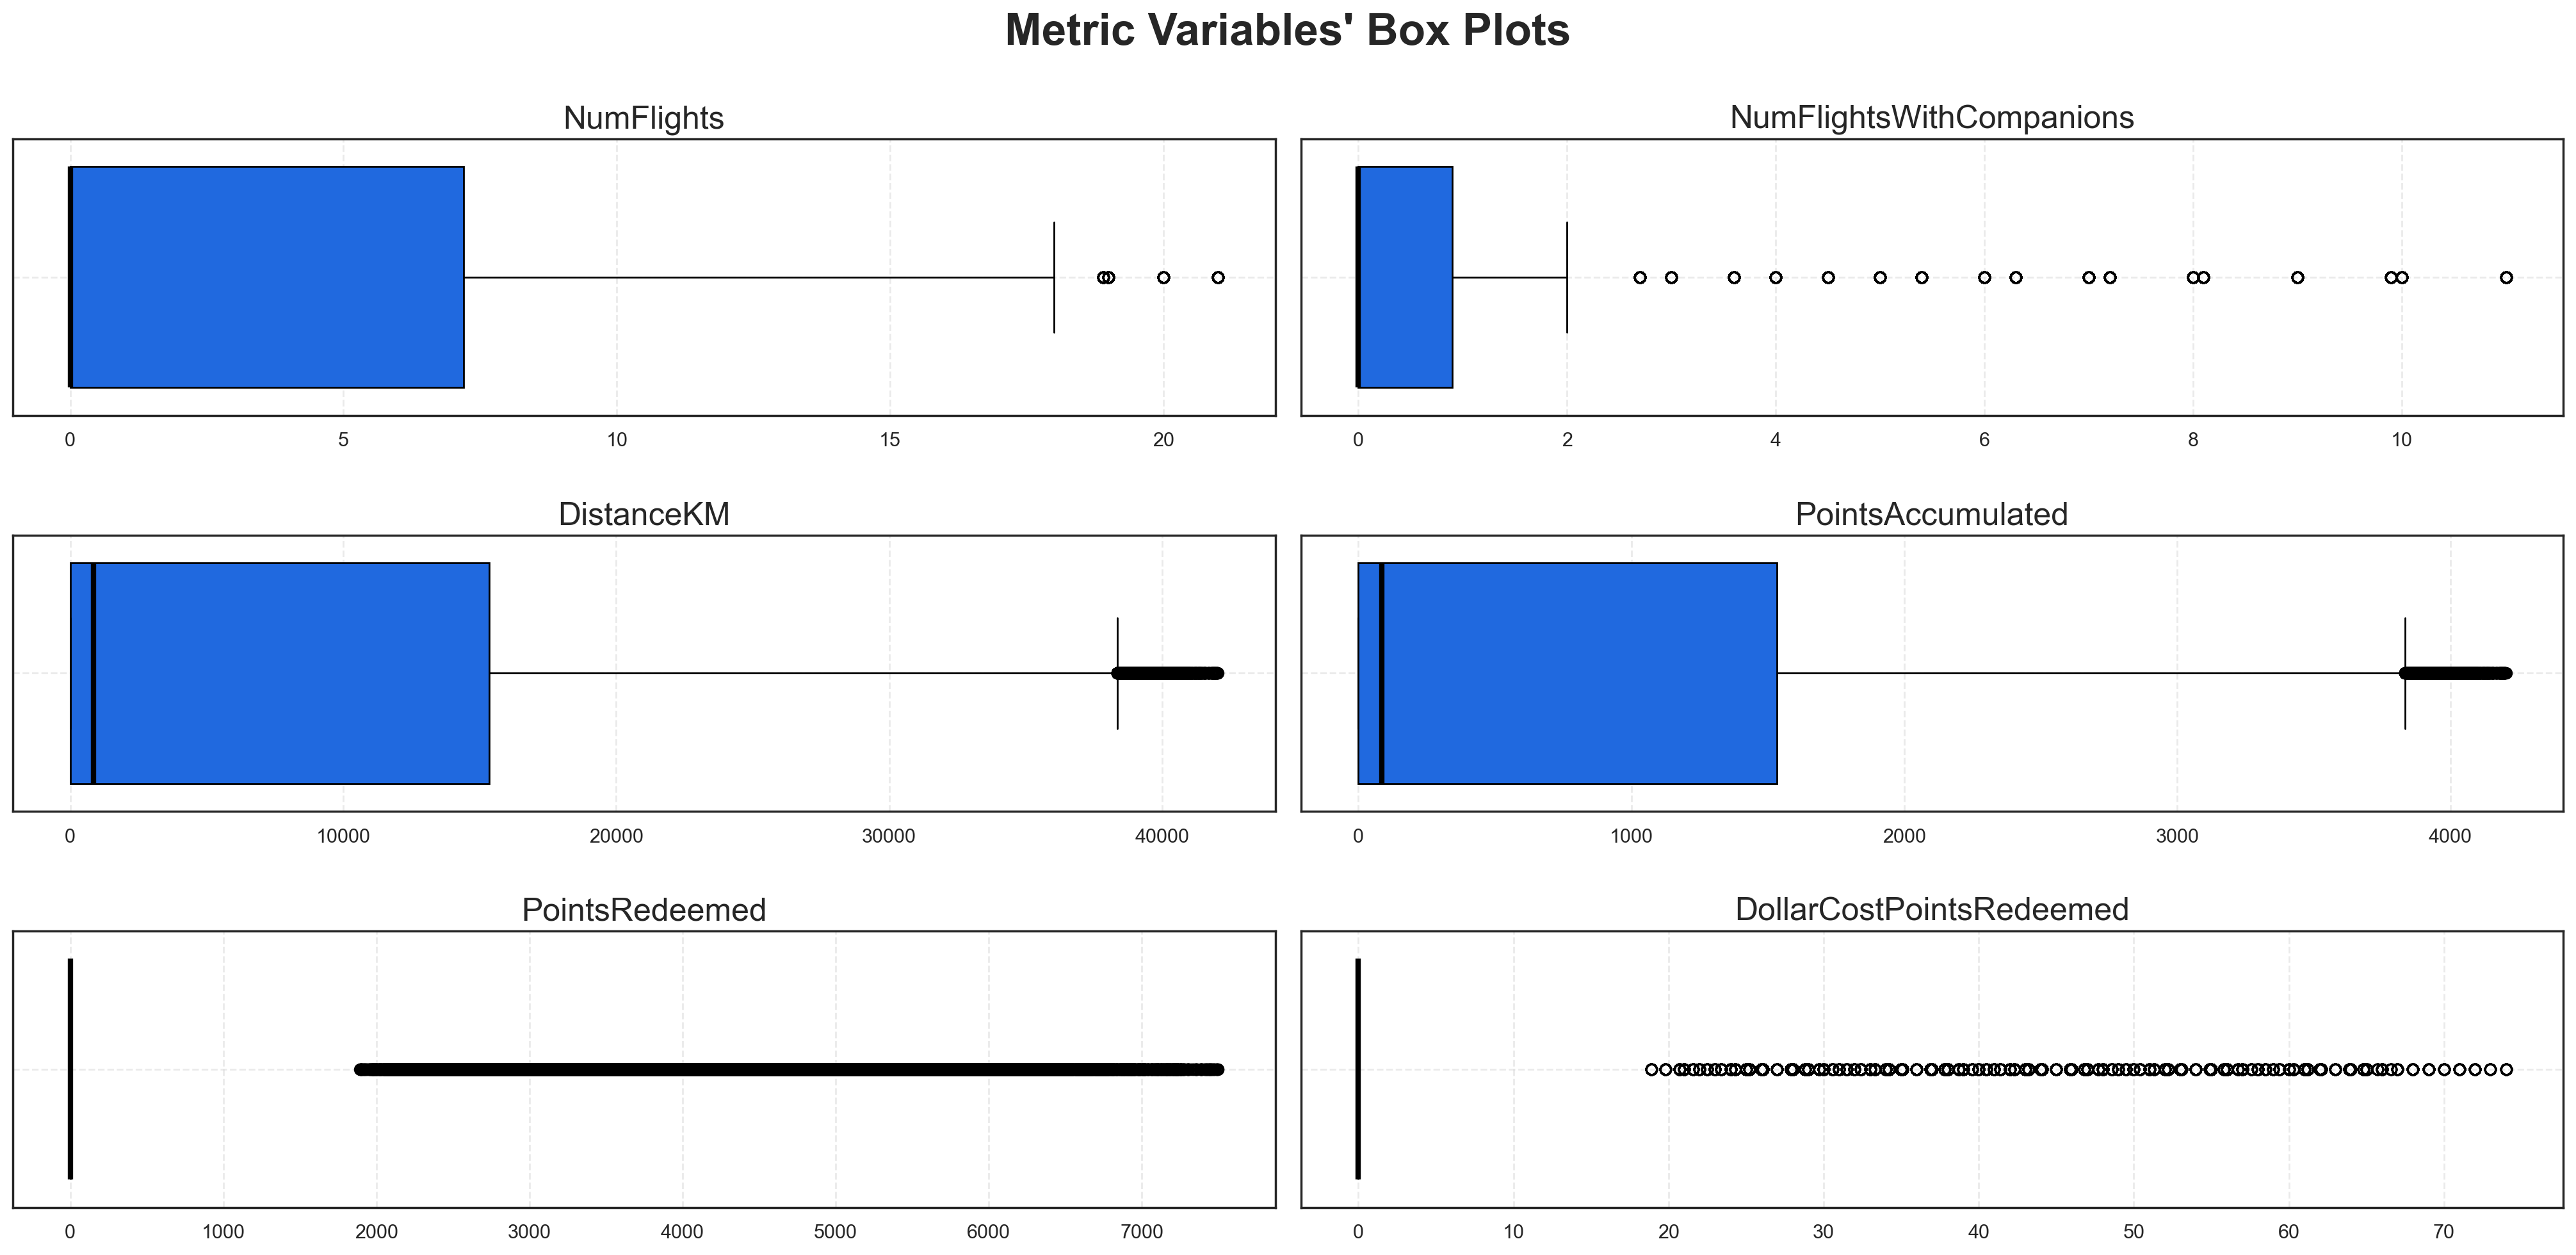

In [152]:
# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(sp_rows_FDB, 
                         sp_cols_FDB, 
                         figsize=(20, 10),
                         constrained_layout=True) # Adjust automatically spacing between subplot and labels 

# Increase vertical space between rows
fig.set_constrained_layout_pads(h_pad=.2)

# Plot data
# Iterate across axes objects and associate each box plot:
for ax, feat in zip(axes.flatten(), metric_features_FDB[2:]): # "[2:]" to skip Year and Month features
    sns.boxplot(x=flightsDB[feat], ax=ax,
                # Set inside color to blue
                color="#0062FF",
                # Set line colors to black
                boxprops=dict(edgecolor="black"),
                whiskerprops=dict(color="black"),
                capprops=dict(color="black"),
                medianprops=dict(color="black", linewidth=3),
                flierprops=dict(markeredgecolor="black"))
    
    # Put grid with low opacity and dashed line so it's visible, but not distracting
    ax.grid(True, linestyle="--", alpha=0.4)

    # Put title of each graph with bigger font
    ax.set_title(feat, fontsize=18)

    # Hide x label since we already have the boxlplot title at the top
    ax.set_xlabel("")
    
# Layout
# Add title and make it bigger
plt.suptitle("Metric Variables' Box Plots", 
             fontsize = 25, fontweight="bold")

# Create the folder '../figures/eda' if it doesn't already exist
os.makedirs(os.path.join('..', 'figures', 'eda'), exist_ok=True)

# Save figure to a png file in the folder created before
plt.savefig(os.path.join('..', 'figures', 'eda', 'numeric_variables_boxplots.png'), dpi=200)

# Show plot
plt.show()

From the boxplots above we can conclude that:

- `Number of Flights:` Low median and strong skew to the right (positive asymmetry). Many outliers above ~15 flights — few customers travel frequently;
- `Number of Flights with Companions:` Median close to 0 and some outliers that represent the clients that travel in big groups;
- `Distance KM:` large number of short flights and a few very long ones that greatly influence the average;
- `Points Accumulated:` Very low median and a lot of outliers. This means that only a few customers accumulate large volumes of points;
-`Points Redeemed:` The same as before, a very big majority of values are low with a big number of outliers;
- `Dollar Cost Points Redeemed and Points Redeemed:` A very similar distribution to 'Points Redeemed' as expected, with the majority of values being close to 0 and many outliers.

## Relationship between Metric Features (FlightsDB)

### **Scatterplots**

Are used to visualize the relationships between numerical features in the dataset. These plots display individual data points along two axes, allowing us to observe patterns such as correlations, clusters, and outliers. Through this visualization, we can better understand how different factors, such as flight frequency, distance traveled, and loyalty points relate to each other. The scatterplots provide valuable insights into customer behavior, highlighting potential trends and dependencies between variables.

#### Initial Scatterplot

We start by performing a general and straightforward analysis of several relationships between features that could potentially be significant. Based on the results of this initial exploration, we then focus on examining in greater detail the relationships that appear to be the most informative or meaningful for further analysis.

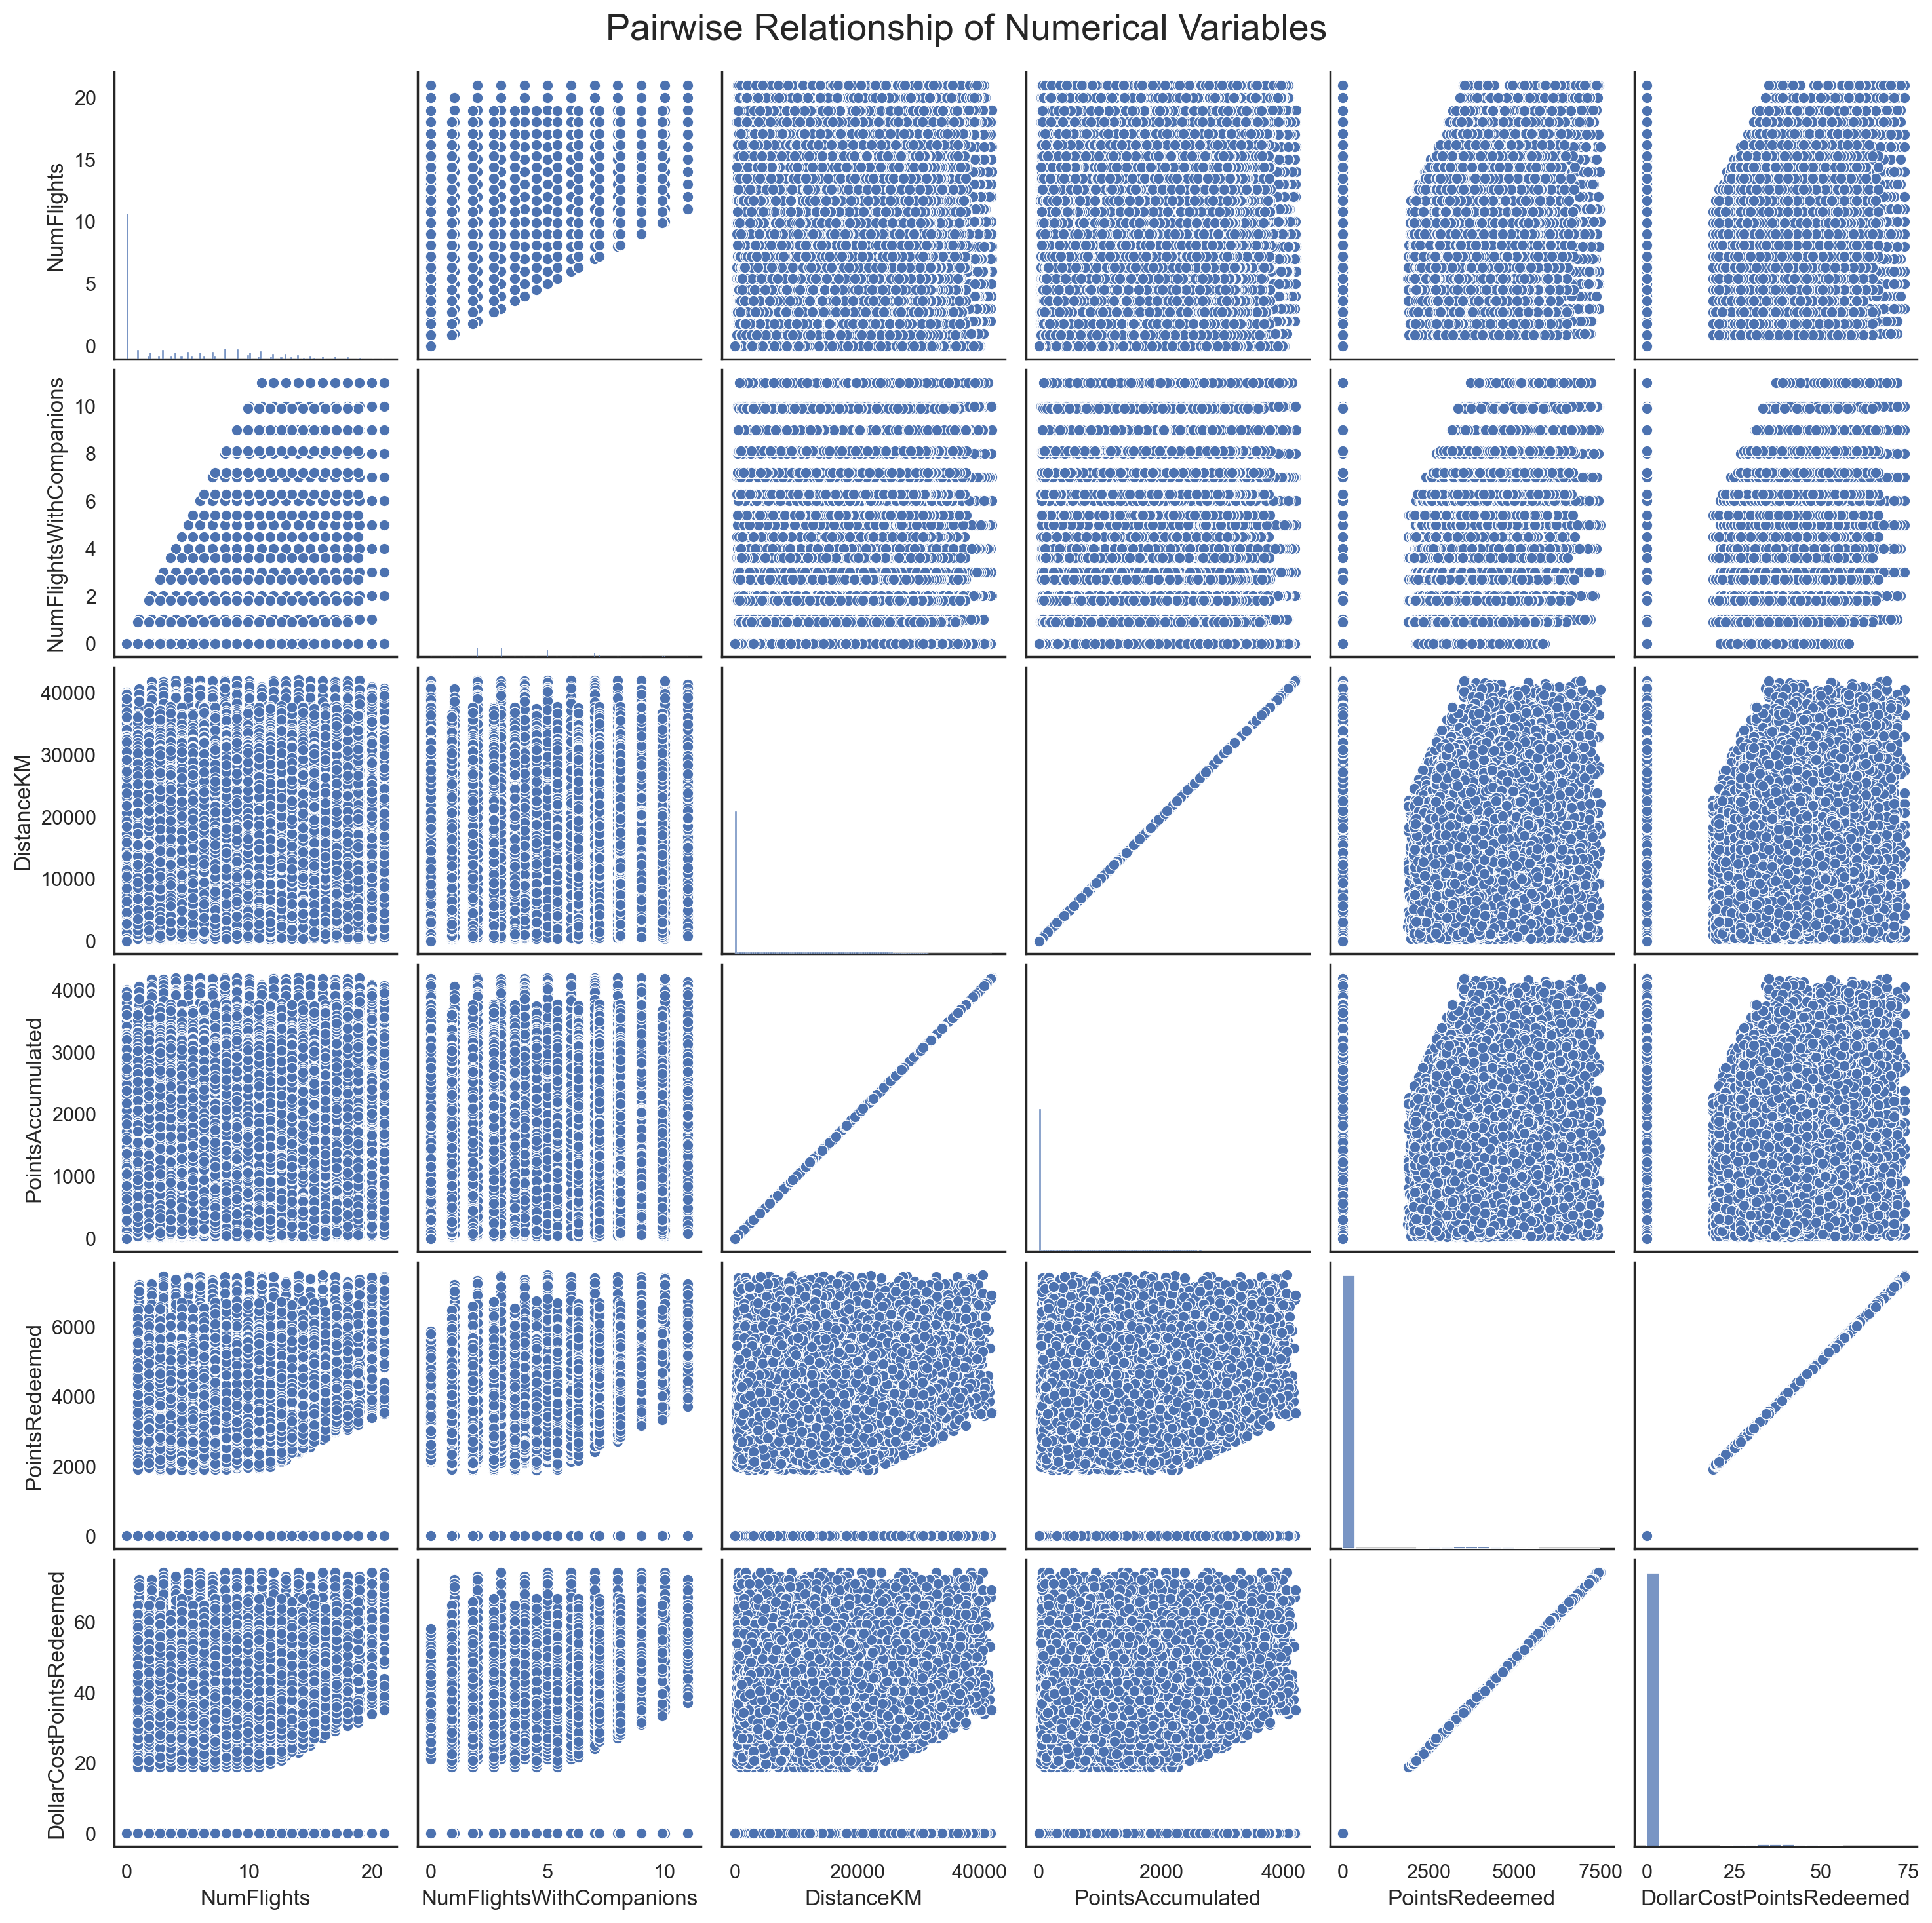

In [153]:
####
sns.pairplot(flightsDB[metric_features_FDB[2:]], diag_kind="hist") # "[2:]" to skip Year and Month features
####

plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise Relationship of Numerical Variables", fontsize=20)
plt.show()

These plots provided an overview of general trends, distributions, and potential correlations. From this initial exploration, certain relationships appear to be more meaningful and warrant deeper investigation. Specifically, we will focus on some scatterplots that show patterns that could reveal significant insights into customer behavior and the relationship between flight activity, loyalty points, and redemption value.

#### **NumFlights vs NumFlightsWithCompanions**

This analysis explores the relationship between the total number of flights taken and the number of flights taken with companions. Understanding this connection may reveal behavioral patterns in group travel and customer loyalty dynamics.

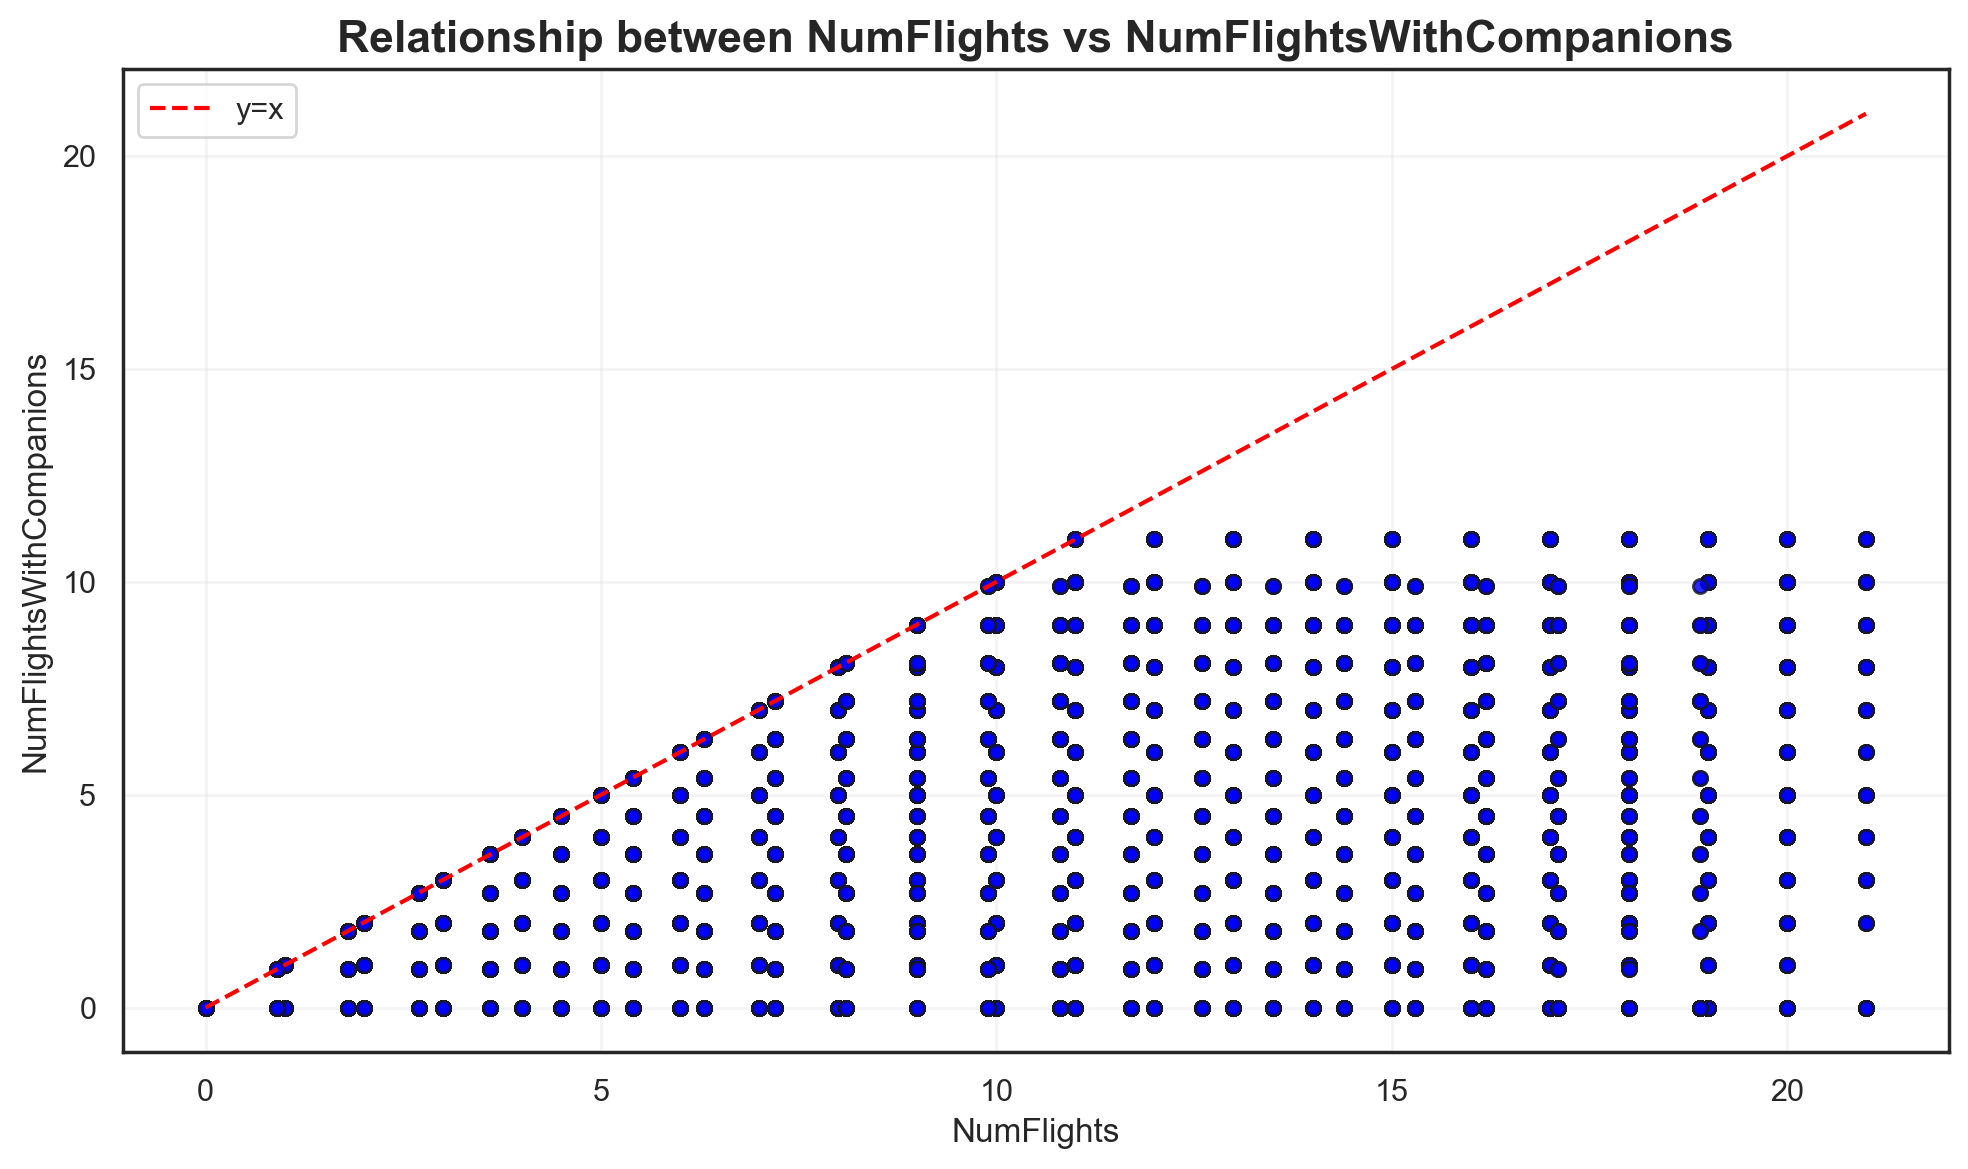

In [154]:
x = flightsDB["NumFlights"]
y = flightsDB["NumFlightsWithCompanions"]

plt.figure(figsize=(10, 6))
plt.scatter(x, y, s=25, alpha=0.3, c='blue', edgecolor='k')
plt.plot([0, x.max()], [0, x.max()], color='red', linestyle='--', label='y=x')
plt.title("Relationship between NumFlights vs NumFlightsWithCompanions", fontsize=16, fontweight='bold')
plt.xlabel("NumFlights")
plt.ylabel("NumFlightsWithCompanions")
plt.legend()
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()


The analysis shows a positive relationship between the features analysed. Passengers who fly more frequently also tend to travel more often with others, suggesting that regular travelers might belong to customer segments such as families or business groups. This insight could be useful for targeted marketing or loyalty program strategies focused on group travel.

#### **DistanceKM and PointsAccumulated**

Here, the goal is to examine how the distance traveled influences the accumulation of loyalty points. This relationship can indicate whether longer trips directly contribute to higher reward earnings and program engagement.

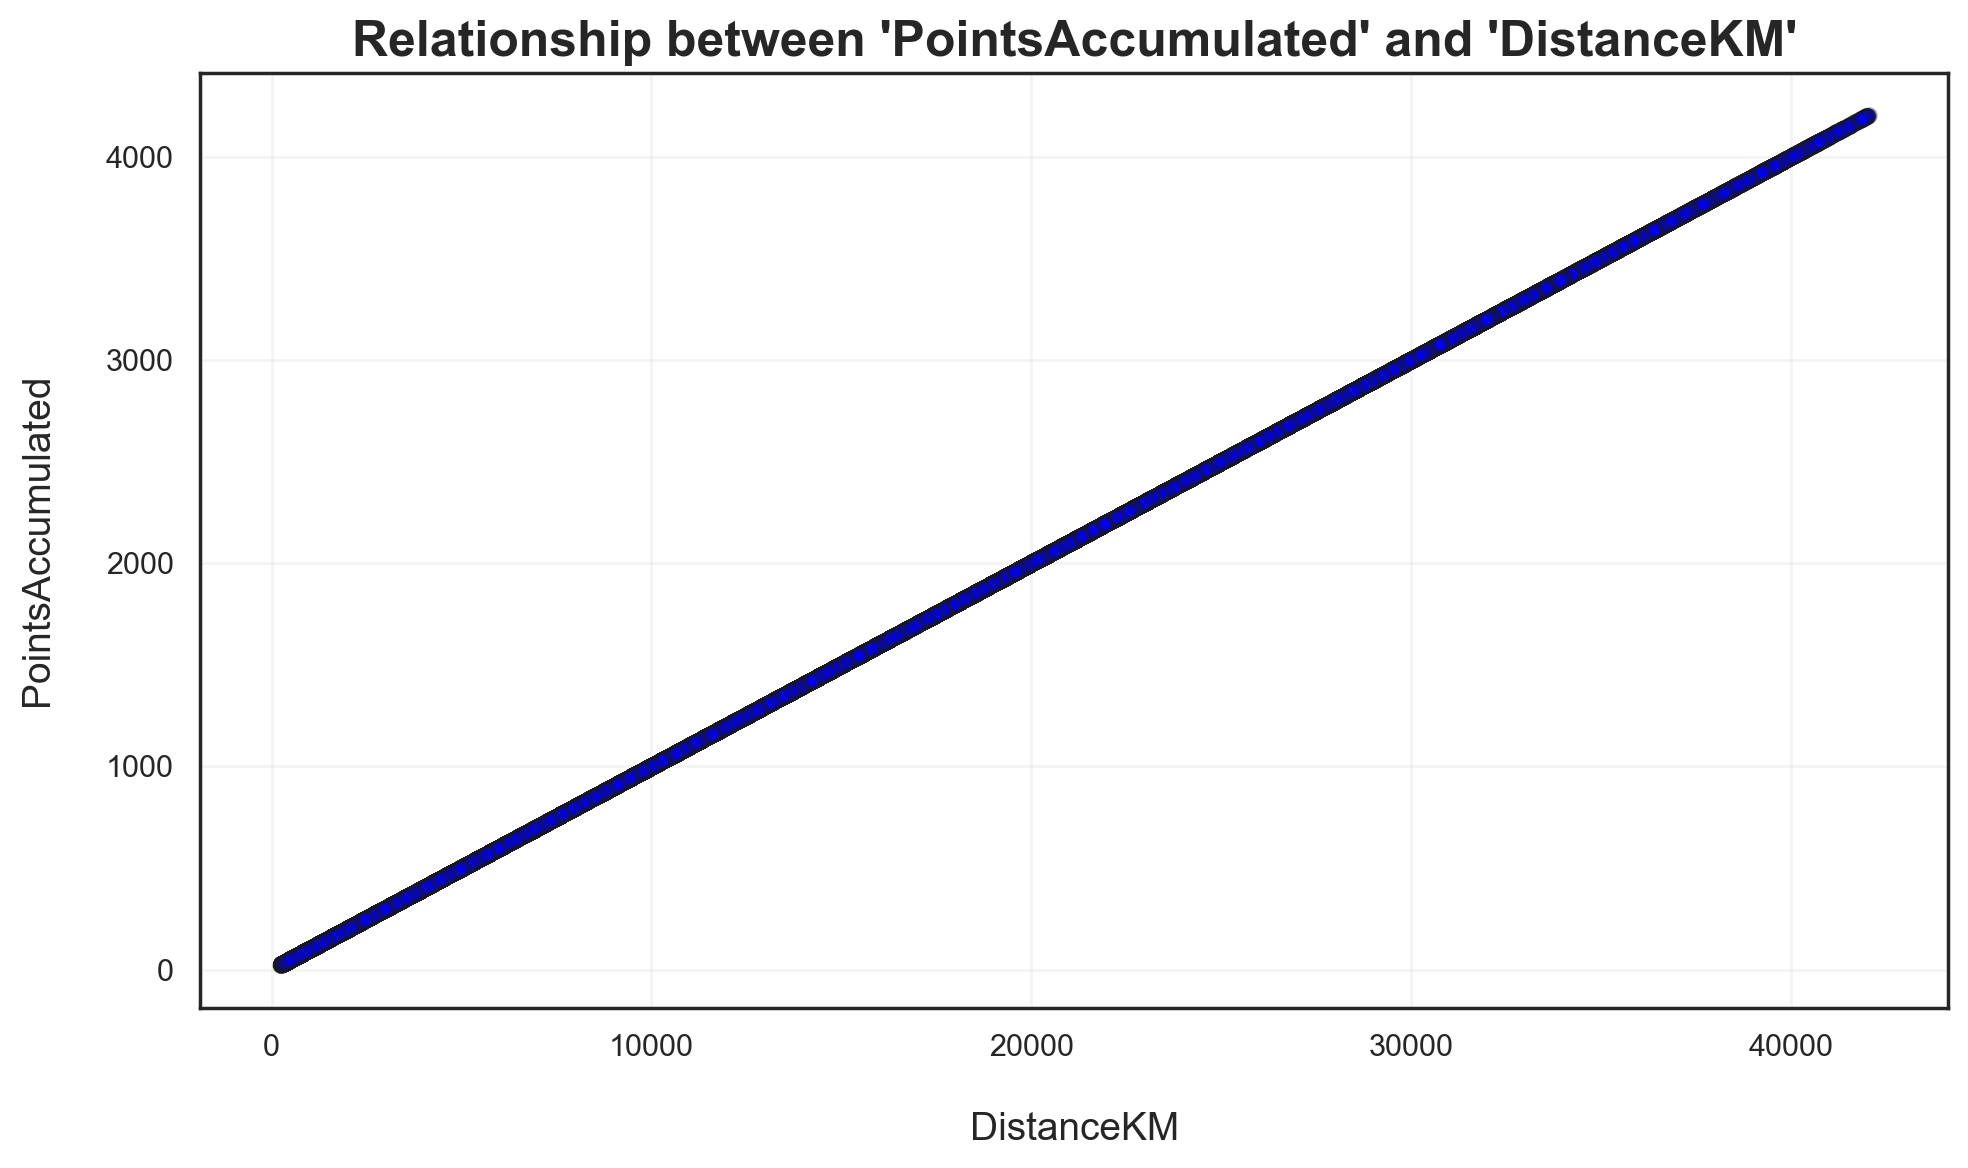

In [155]:
mask = ((flightsDB["DistanceKM"] > 0) &
        (flightsDB["PointsAccumulated"] > 0))

distance_clean = flightsDB.loc[mask, "DistanceKM"]
points_acc = flightsDB.loc[mask, "PointsAccumulated"]

# Scatter plot
plt.figure(figsize=(10, 6))
sns.set_style("white")
plt.scatter(distance_clean, points_acc, s=25, alpha=0.3, c='blue', edgecolor='k')

# The line below is commented out because it's not required once the scatter plot created has a completly linear trend.

# Fit a linear trend line
# coeffs = np.polyfit(distance_clean, points_acc, 1)
# trend = np.poly1d(coeffs)
# x = np.linspace(distance_clean.min(), distance_clean.max(), 100)
# plt.plot(x, trend(x), color='red', linewidth=2)  # Line

plt.title("Relationship between 'PointsAccumulated' and 'DistanceKM'", fontsize=18, fontweight='bold')
plt.xlabel("DistanceKM", fontsize=14, labelpad=18)
plt.ylabel("PointsAccumulated", fontsize=14, labelpad=18)
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()


A strong linear relationship was observed between distance traveled and points accumulated, indicating that the loyalty program rewards longer flights consistently. This predictable correlation confirms that distance is a key driver of point accumulation, and it may serve as a reliable metric for understanding customer engagement through mileage.

#### **PointsAccumulated vs PointsRedeemed**

This section investigates the balance between points earned and points redeemed. Analyzing this relationship helps assess customer redemption behavior and the effectiveness of the loyalty program.

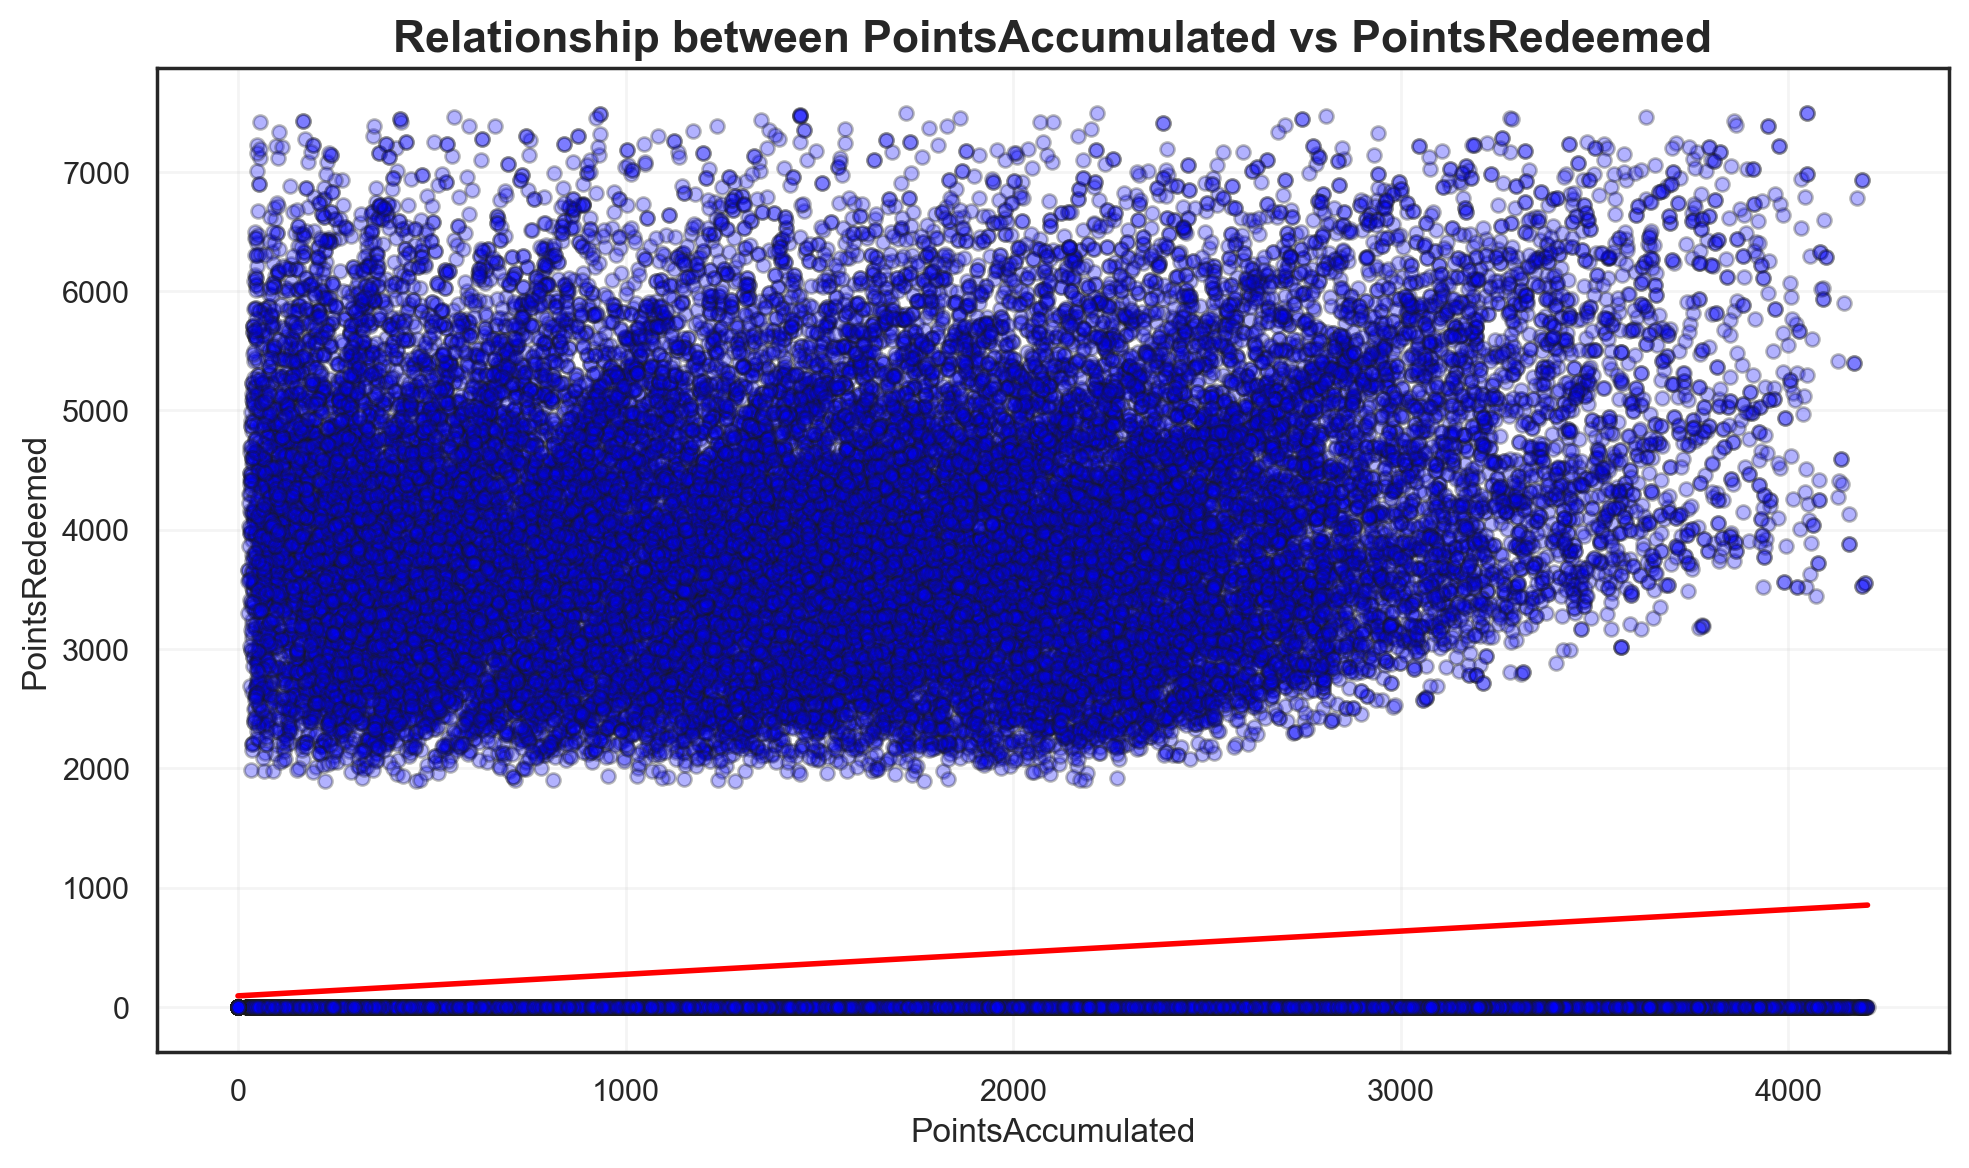

In [156]:
x = flightsDB["PointsAccumulated"]
y = flightsDB["PointsRedeemed"]

plt.figure(figsize=(10, 6))
plt.scatter(x, y, s=25, alpha=0.3, c='blue', edgecolor='k')

# Linear trend
coeffs = np.polyfit(x, y, 1)
trend = np.poly1d(coeffs)
x_vals = np.linspace(x.min(), x.max(), 100)
plt.plot(x_vals, trend(x_vals), color='red', linewidth=2)

plt.title("Relationship between PointsAccumulated vs PointsRedeemed", fontsize=16, fontweight='bold')
plt.xlabel("PointsAccumulated")
plt.ylabel("PointsRedeemed")
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()


The scatterplot suggests that while many customers accumulate points, a significant portion do not redeem them frequently. There is a general upward trend, but with notable dispersion, especially at lower redemption levels. This may indicate varying engagement levels or potential barriers to redemption, providing an opportunity to enhance program usability and encourage point utilization.

#### **PointsRedeemed vs DollarCostPointsRedeemed**

In this part, the focus is on understanding the correlation between the number of points redeemed and their equivalent dollar value. This can provide insights into the real-world value of points and the efficiency of the redemption system.

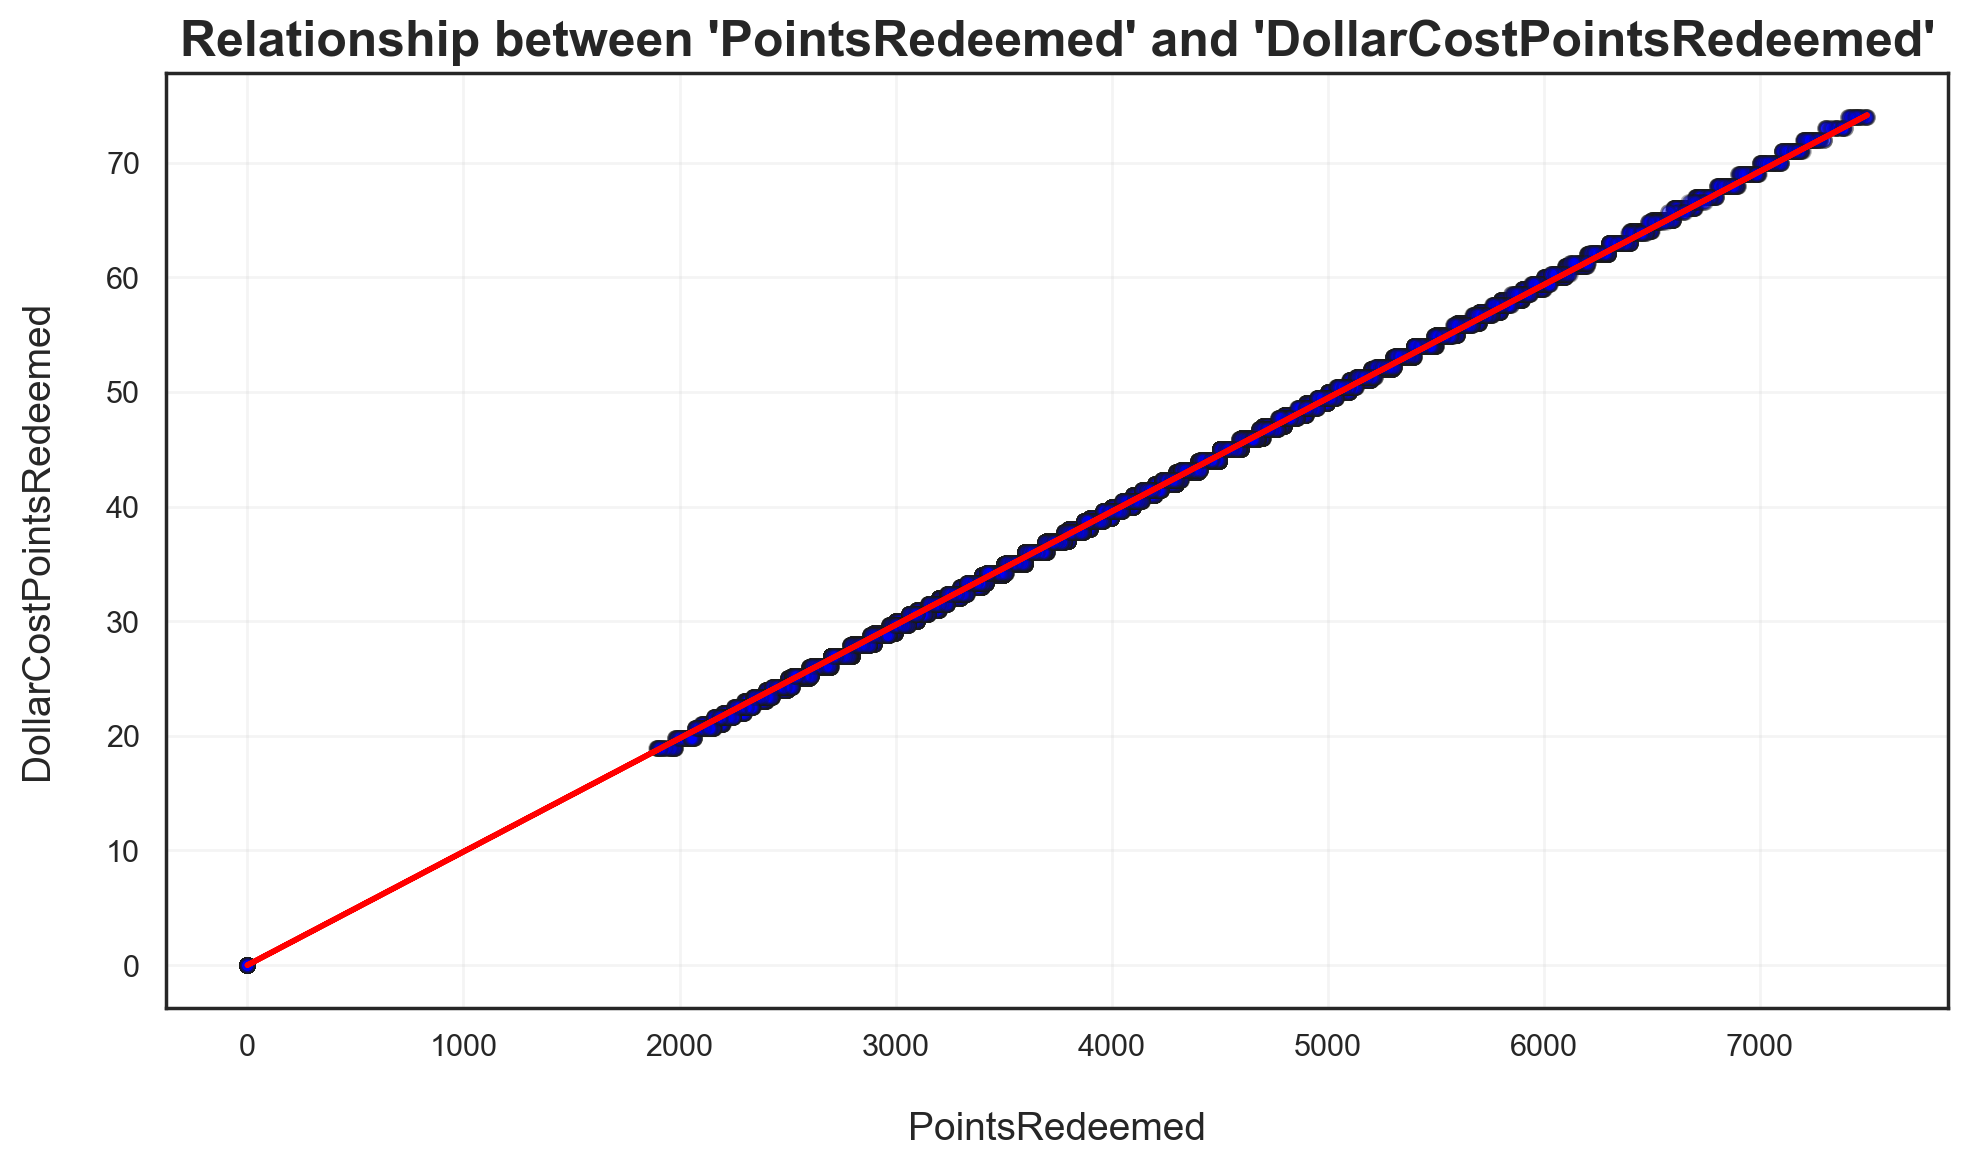

In [157]:
x = flightsDB["PointsRedeemed"]
y = flightsDB["DollarCostPointsRedeemed"]

# Scatter plot as before
plt.figure(figsize=(10, 6))
sns.set_style("white")
plt.scatter(x, y, s=25, alpha=0.3, c='blue', edgecolor='k')

# Fit a linear trend line
coeffs = np.polyfit(x, y, 1)
trend = np.poly1d(coeffs)
plt.plot(x, trend(x), color='red', linewidth=2)  # Line

plt.title("Relationship between 'PointsRedeemed' and 'DollarCostPointsRedeemed'", fontsize=18, fontweight='bold')
plt.xlabel("PointsRedeemed", fontsize=14, labelpad=18)
plt.ylabel("DollarCostPointsRedeemed", fontsize=14, labelpad=18)
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()


This relationship appears highly linear, showing that the dollar value increases proportionally with the number of points redeemed. This consistency suggests that the loyalty program maintains a stable and transparent conversion rate between points and monetary value, reinforcing customer trust in the redemption process.

### **Hexbin Plots**

Hexbin plots will be used as a complementary visualization technique. These plots provide a clearer view of data density and distribution, helping to identify areas of concentration and potential patterns that are less visible in traditional scatterplots.

Before show the next plot, several hexbin plots were generated to explore the relationships between numerical features in the dataset. However, most of the resulting visualizations were not suitable for meaningful analysis, as the plots appeared uniformly colored, indicating highly unbalanced data distributions and extreme value ranges. These characteristics caused the density representation to collapse, making it difficult to distinguish patterns or trends.
For this reason, only the final hexbin plot was retained for analysis, as it provided at least some visible variation and offered limited but interpretable insights.

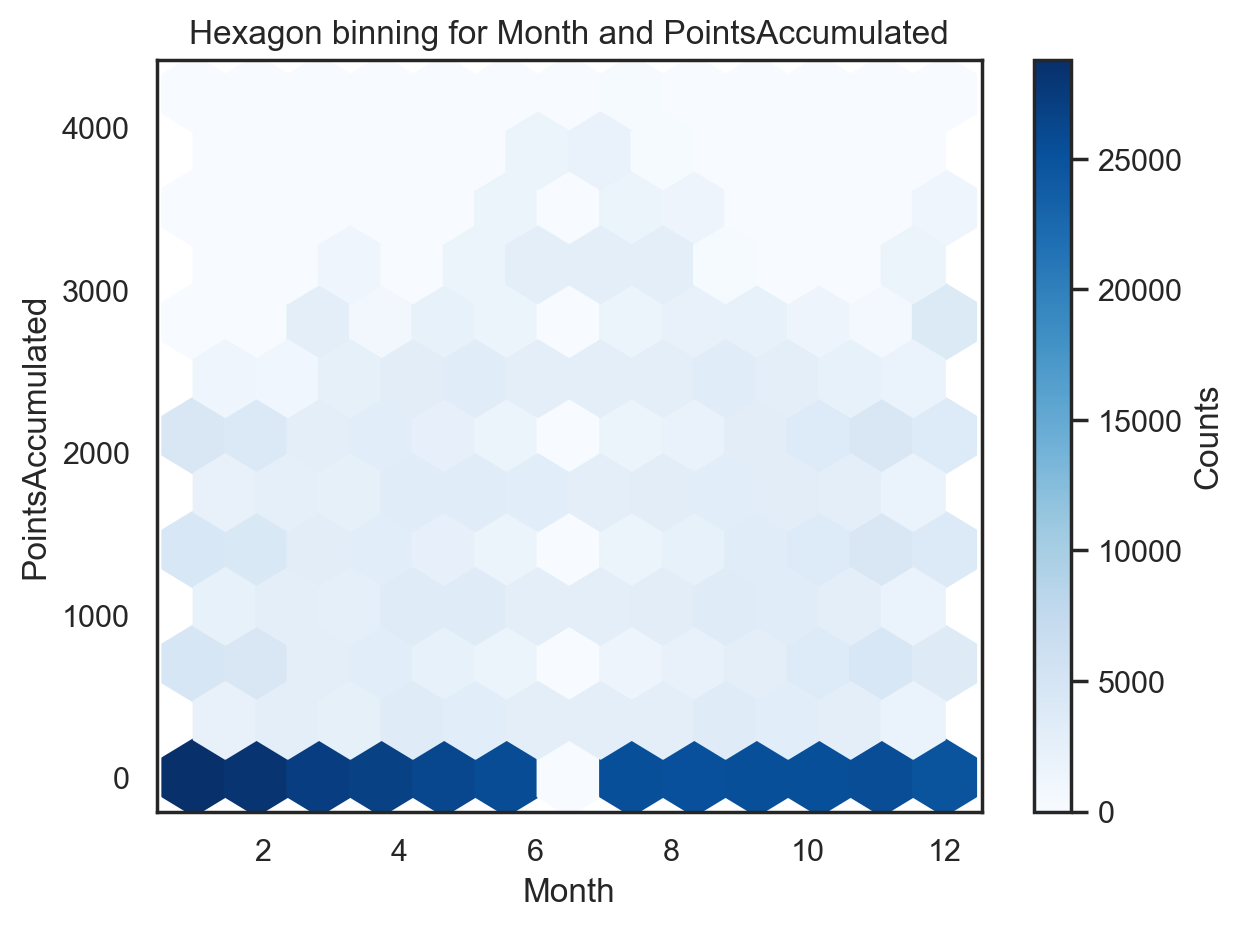

In [158]:
# Month vs PointsAccumulated
plt.hexbin(flightsDB["Month"], flightsDB["PointsAccumulated"], gridsize=12, cmap="Blues")
plt.title("Hexagon binning for Month and PointsAccumulated")
plt.xlabel("Month")
plt.ylabel("PointsAccumulated")
plt.colorbar(label="Counts")

plt.tight_layout()
plt.show()


The hexbin plot shows the distribution of loyalty points accumulated by customers across different months. Most of the data points are concentrated near the lower range of PointsAccumulated values (close to zero), regardless of the month. This indicates that, for the majority of customers, the number of points earned each month is relatively small.
There are no clear seasonal patterns or noticeable peaks in any particular month, this means that the density appears consistent throughout the year. Therefore, we can conclude that customer flight activity and point accumulation are relatively stable across months, with no significant seasonal variation observed.

### **KDE Plots (2D)**

This plots help us visualizing the probability density of continuous variables, providing a smooth representation of their distributions.
However, due to the large size of the Flights Database, running KDE plots on the full dataset proved computationally heavy and time-consuming.
To address this, a random sample of 15,000 observations was used instead. Although this represents only a subset of the total data, it still covers nearly half of the full dataset, offering a reliable approximation of the overall distribution while keeping the code efficient and manageable.
This sampling approach allows us to preserve interpretability and performance without significantly compromising the quality of the insights.

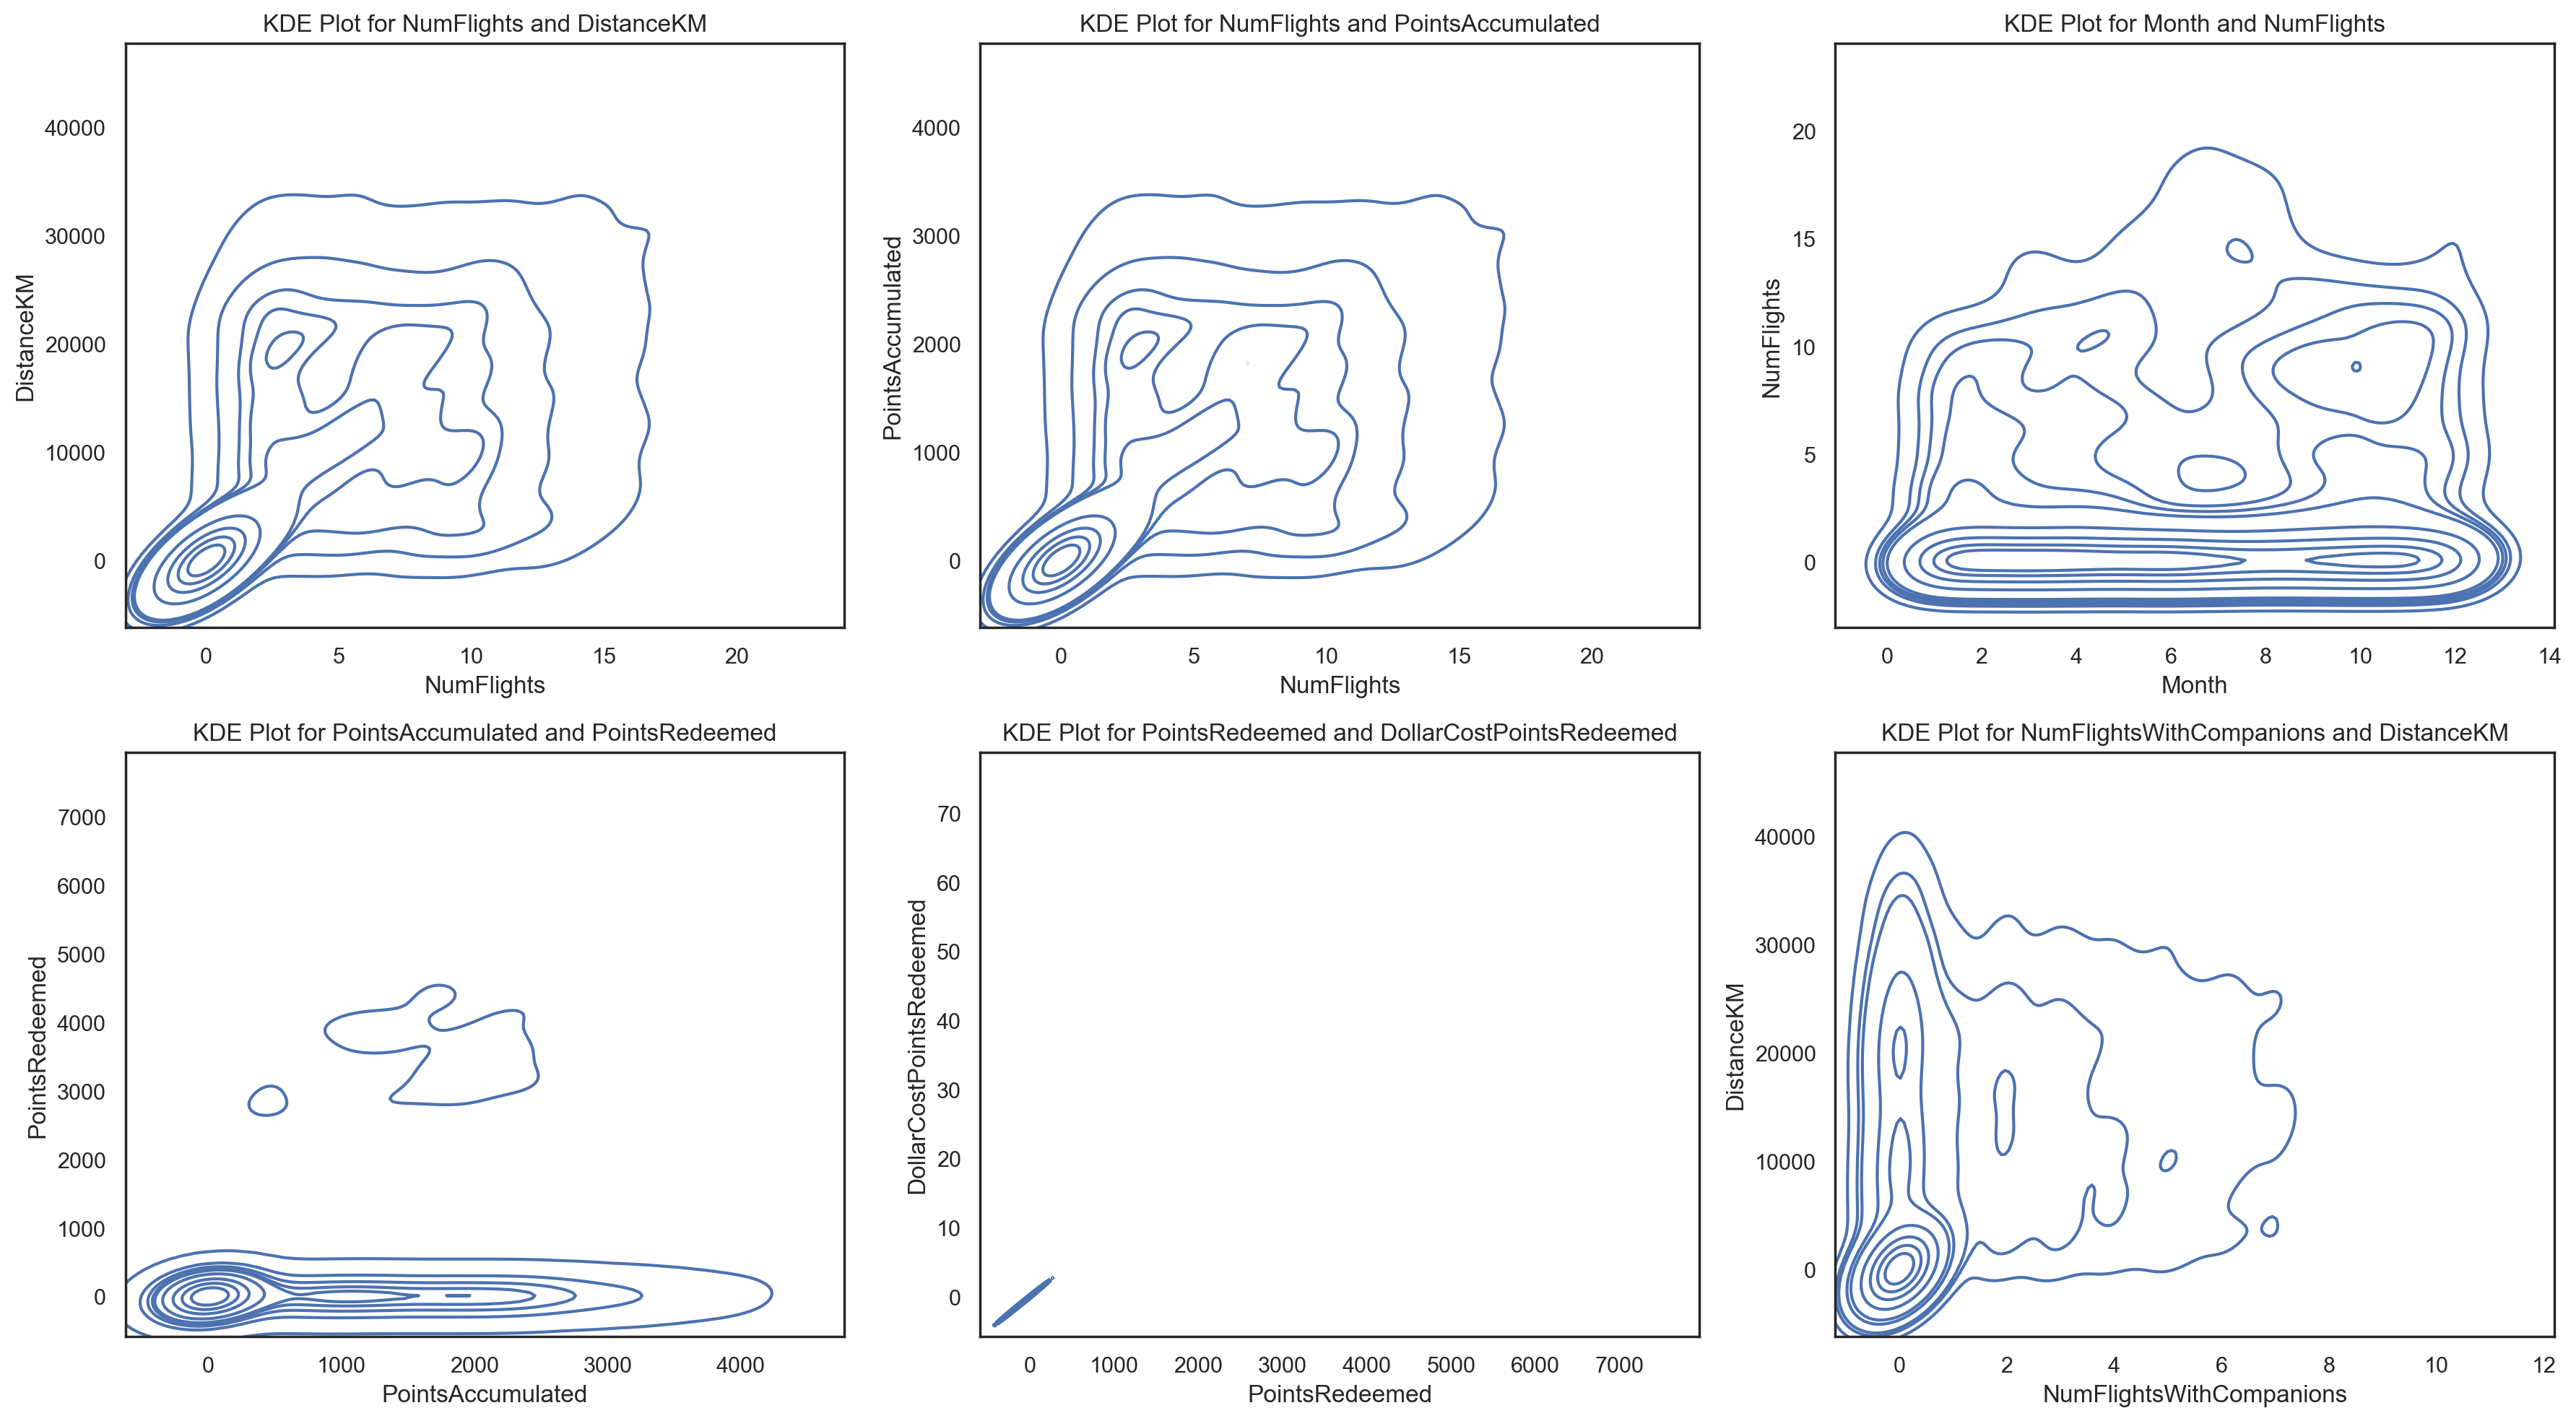

In [159]:
# a samples of 20,000 rows is created to make the plots less dense and it's possible to use this kind of plot
sample = flightsDB.sample(15_000, random_state=42)

plt.figure(figsize=(18, 10))

# NumFlights vs DistanceKM
plt.subplot(2, 3, 1)
sns.kdeplot(data=sample, x="NumFlights", y="DistanceKM")
plt.title("KDE Plot for NumFlights and DistanceKM")
plt.xlabel("NumFlights")
plt.ylabel("DistanceKM")

# NumFlights vs PointsAccumulated
plt.subplot(2, 3, 2)
sns.kdeplot(data=sample, x="NumFlights", y="PointsAccumulated")
plt.title("KDE Plot for NumFlights and PointsAccumulated")
plt.xlabel("NumFlights")
plt.ylabel("PointsAccumulated")

# NumFlights vs Month
plt.subplot(2, 3, 3)
sns.kdeplot(data=sample, x="Month", y="NumFlights")
plt.title("KDE Plot for Month and NumFlights")
plt.xlabel("Month")
plt.ylabel("NumFlights")

# PointsAccumulated vs PointsRedeemed
plt.subplot(2, 3, 4)
sns.kdeplot(data=sample, x="PointsAccumulated", y="PointsRedeemed")
plt.title("KDE Plot for PointsAccumulated and PointsRedeemed")
plt.xlabel("PointsAccumulated")
plt.ylabel("PointsRedeemed")

# PointsRedeemed vs DollarCostPointsRedeemed
plt.subplot(2, 3, 5)
sns.kdeplot(data=sample, x="PointsRedeemed", y="DollarCostPointsRedeemed")
plt.title("KDE Plot for PointsRedeemed and DollarCostPointsRedeemed")
plt.xlabel("PointsRedeemed")
plt.ylabel("DollarCostPointsRedeemed")

# NumFlightsWithCompanions vs DistanceKM
plt.subplot(2, 3, 6)
sns.kdeplot(data=sample, x="NumFlightsWithCompanions", y="DistanceKM")
plt.title("KDE Plot for NumFlightsWithCompanions and DistanceKM")
plt.xlabel("NumFlightsWithCompanions")
plt.ylabel("DistanceKM")


plt.tight_layout()
plt.show()


 Overall, the density distributions reveal that most clients tend to take only a few flights per month, travel relatively short distances, and accumulate and redeem few points. The results also show consistent and expected relationships, such as the positive association between the number of flights, total distance traveled, and points accumulated.

In contrast, only a small subset of customers stands out with higher activity levels, reflecting a typical loyalty program pattern where a minority of frequent flyers account for a large portion of total points and distance. The plots confirm the logical proportionality between redeemed points and their monetary value, while also showing that flights with companions are generally associated with shorter travel distances. 

The KDE analysis reinforces the main trends previously observed with scatterplots, offering a smoother and more interpretable view of the data density across key variable pairs.

## Categorical Features Visualizations (FlightsDB)

### **Bar Plot**

In this first part, boxplots are used to explore the distribution of flight activity across different time components, month/day/year.
The objective is to identify potential temporal patterns or irregularities in flight frequency and activity over the analyzed period.
This visualization helps reveal seasonal trends and possible anomalies related to specific time frames, providing an initial temporal perspective of customer flight behavior.

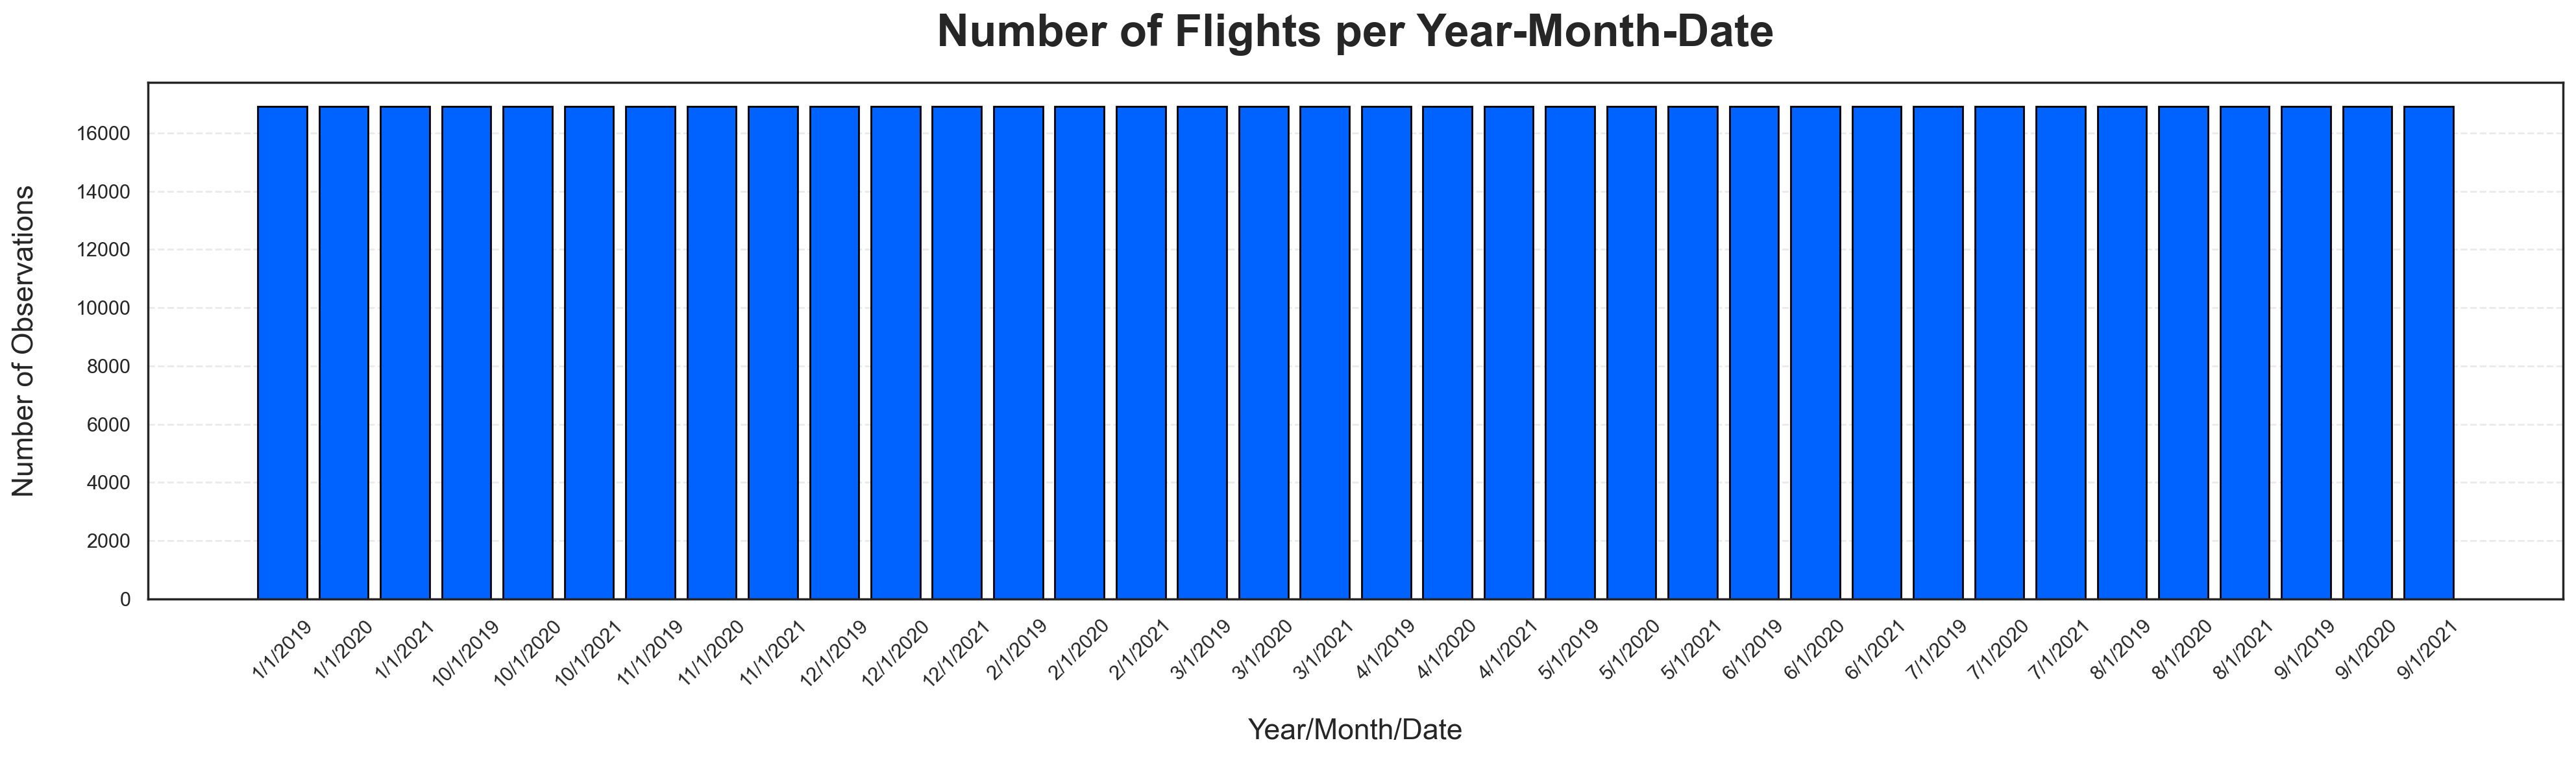

In [160]:
time_counts = flightsDB['YearMonthDate'].value_counts().sort_index()

plt.figure(figsize=(20,6))
bars = plt.bar(time_counts.index, time_counts.values, color="#0062FF", edgecolor="black")

plt.title("Number of Flights per Year-Month-Date", fontsize=25, fontweight="bold", pad=20)
plt.xlabel("Year/Month/Date", fontsize=16, labelpad=15)
plt.ylabel("Number of Observations", fontsize=16, labelpad=20)
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.4, axis="y")
plt.tight_layout()
plt.show()

The bar chart refering to the YearMonthTime variable does not provide relevant information for the analysis, since this feature only considers de first day of each month so the values are uniques or have the same number of records. Therefore, no meaningful conclusions can be drawn from this visualization. However, it confirms a conclusion previously identified: the data is consistent across all months within the three years covered, with no missing entries. Thus, to obtain more relevant information, we will plot the features year and month in separated  and relate the categorical variable "YearMonthDate" with the numerical variable "NumFlights".

In the second part, a matrix of boxplots is presented. For this analysis, the number of flights features were converted from float to integer to correct the previously identified data type issue and ensure more accurate interpretation.
This adjustment allows us to draw more concrete conclusions about travel patterns and customer behavior, while also checking for potential outliers across different temporal and companion-related dimensions.
By comparing these distributions side by side, we gain a clearer understanding of how flight frequency and travel companionship vary throughout the dataset.

In [161]:
flightsDB[["NumFlights", "NumFlightsWithCompanions"]] = flightsDB[["NumFlights", "NumFlightsWithCompanions"]].astype(int)

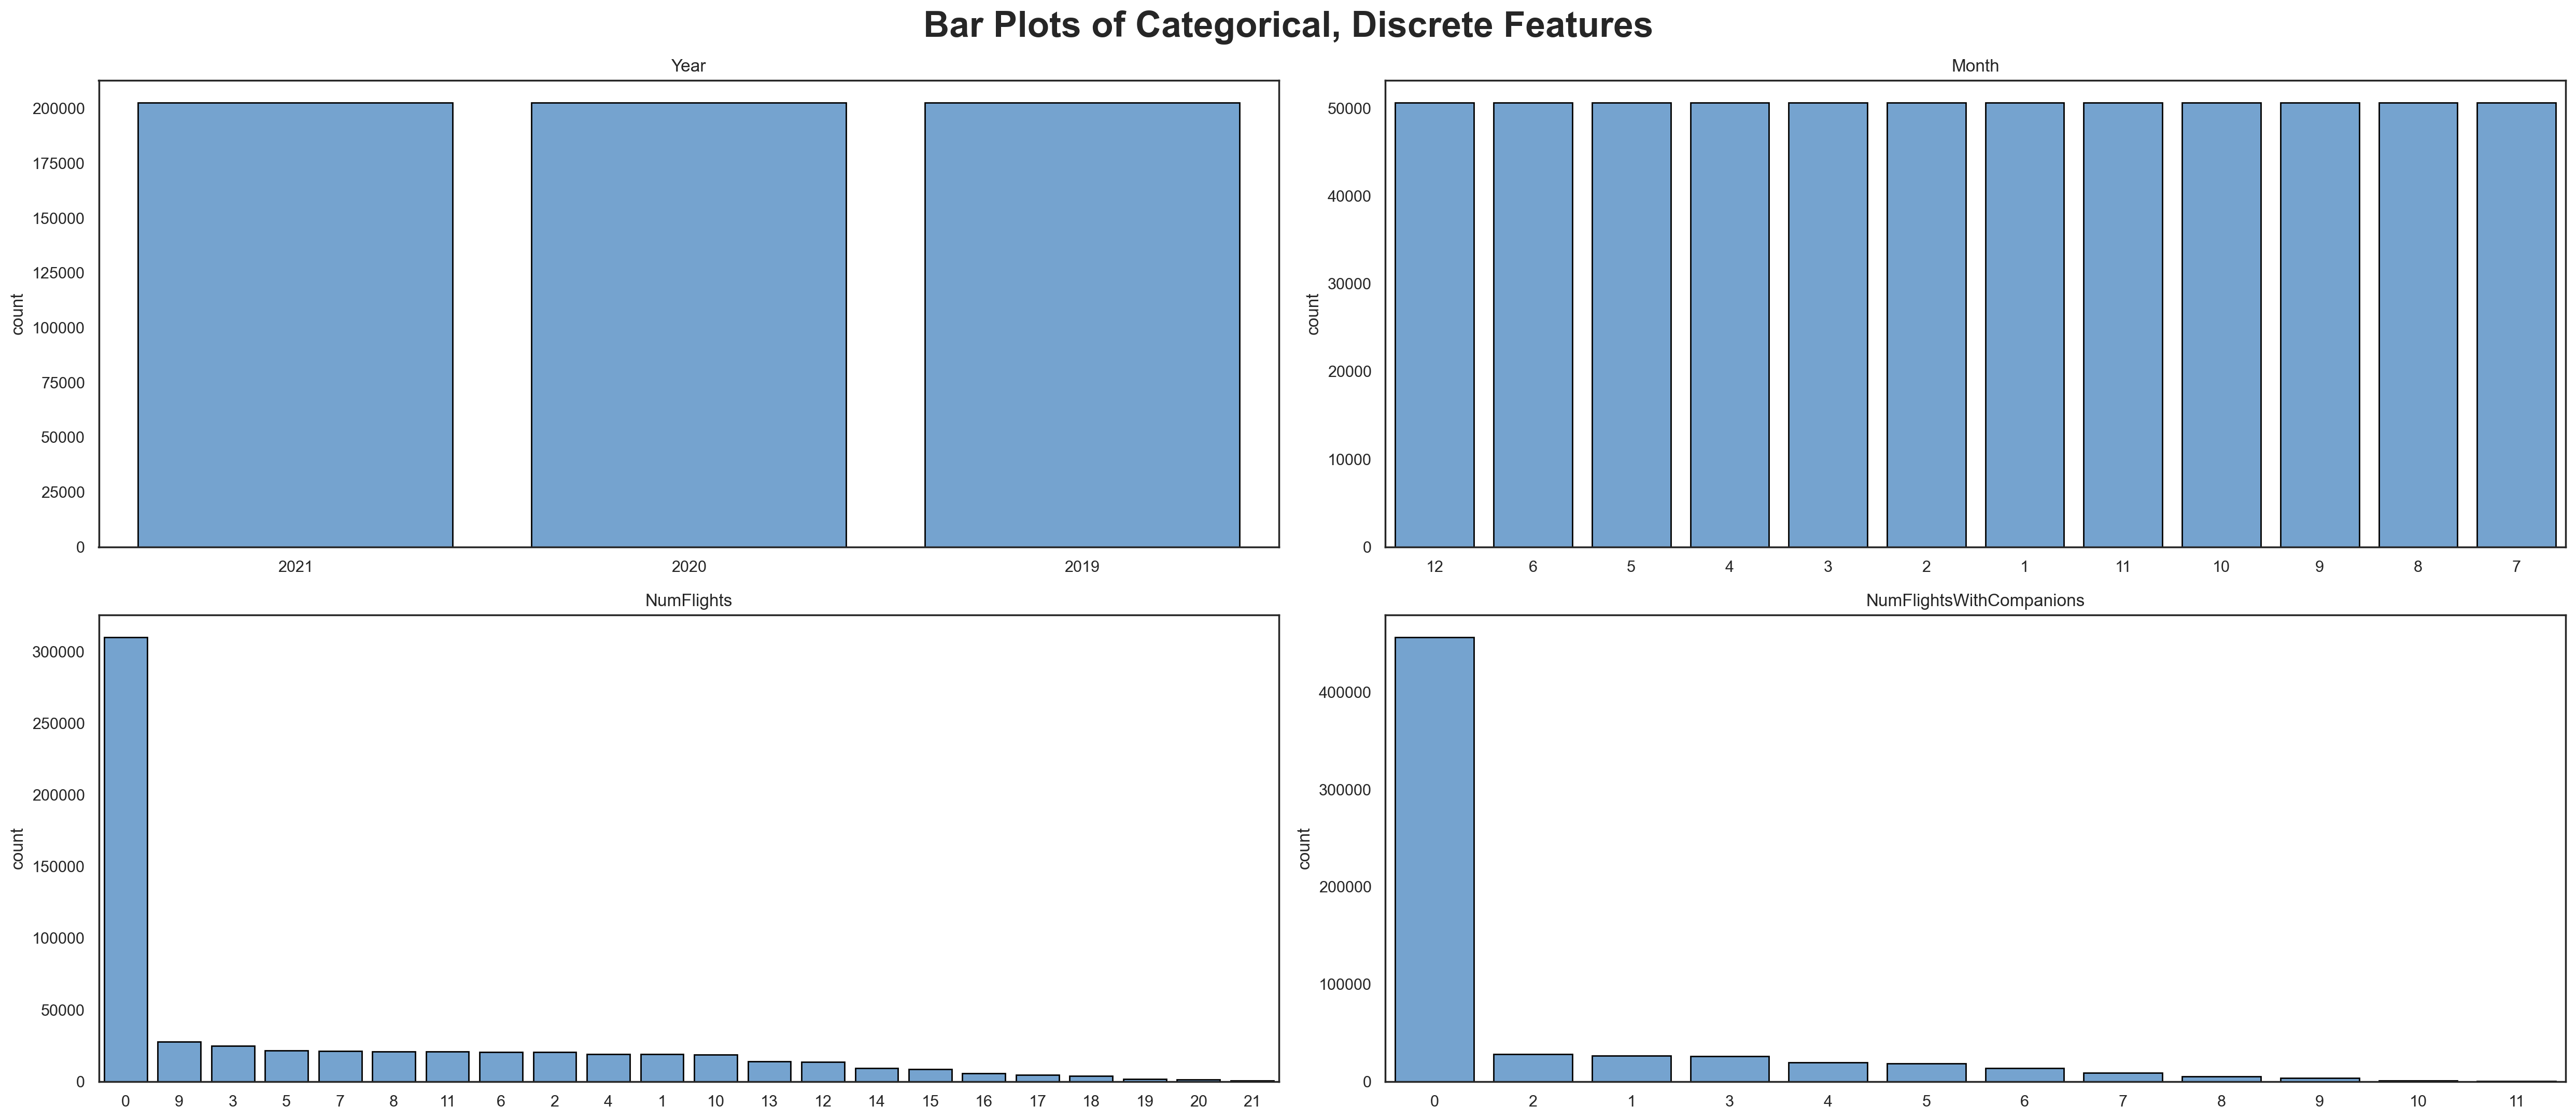

In [162]:
# To do bar plots we use Categorical + Discrete features + dates features
bar_plot_features = metric_features_FDB[:4] # "[:4]" to plot only the year, month

sns.set(style="white")

fig, axes = plt.subplots(2, 2, figsize=(25, 11))

for ax, feat in zip(axes.flatten(), bar_plot_features):
    sns.countplot(x=flightsDB[bar_plot_features][feat], ax=ax, 
                  order=flightsDB[feat].value_counts().index, color="#66a4de", edgecolor="black") 
    ax.set_title(feat)
    ax.set_xlabel('') # Remove x-axis label for clarity

plt.suptitle("Bar Plots of Categorical, Discrete Features", fontsize=25, fontweight="bold")
plt.tight_layout() # Adjust spacing to prevent overlap
plt.show()

The bar plot analysis reveals a consistent distribution of flight activity across the three years and twelve months.
Regarding the number of flights, most customers have very few recorded flights, while only a small portion of the dataset represents frequent travelers.
A similar pattern is observed in the number of flights with companions, where the majority of passengers fly alone, and only a few travel with others on a regular basis.
These distributions highlight the natural skewness of airline data, where occasional travelers dominate the sample and reinforce the need to consider both frequent and infrequent flyers when defining customer segments later in the project.

## Numeric and Categorical Features Visualizations (FlightsDB)

### **Average Number of Flights per Customer**

This line plot shows the monthly trend of the average number of flights per customer over time.
By sorting and plotting the data by YearMonthDate, we can clearly observe the overall evolution of customer flight activity.
The results indicate that flight frequency tends to vary across months, with noticeable peaks and declines that may correspond to seasonal travel patterns or specific promotional periods.

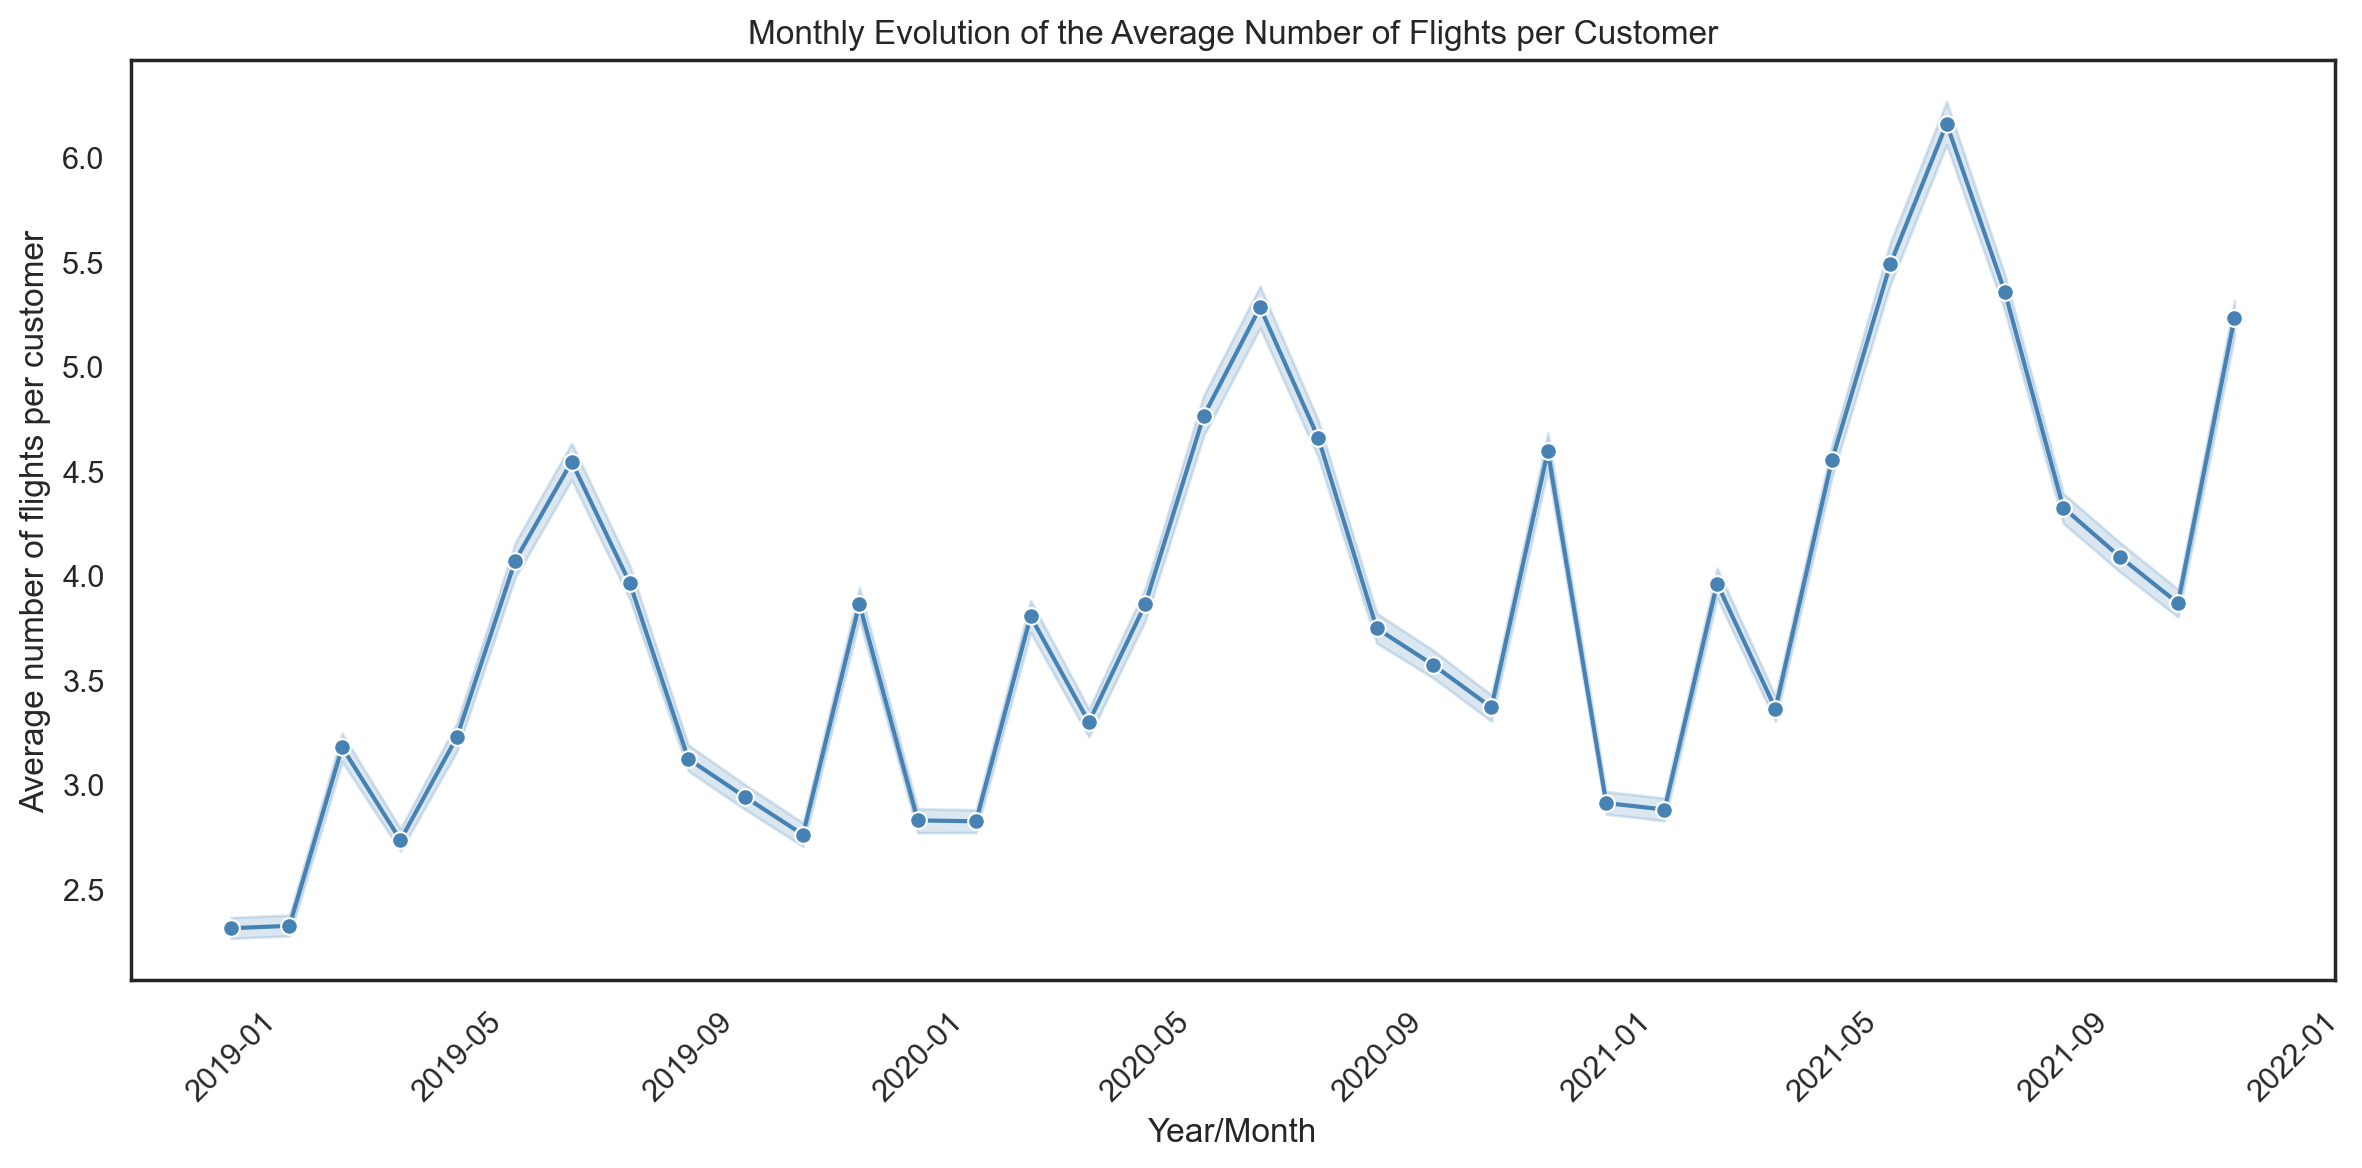

In [163]:
flightsDB["YearMonthDate"] = pd.to_datetime(flightsDB["YearMonthDate"])

# Ordenar pelas datas
flightsDB = flightsDB.sort_values("YearMonthDate")

plt.figure(figsize=(12,6))
sns.lineplot(
    x="YearMonthDate",
    y="NumFlights",
    data=flightsDB,
    marker="o",
    color="steelblue"
)

plt.title("Monthly Evolution of the Average Number of Flights per Customer")
plt.xlabel("Year/Month")
plt.ylabel("Average number of flights per customer")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The graph shows the monthly evolution of the average number of flights per customer between 2019 and 2021.
A significant seasonal variation can be observed, with peaks of activity in certain months—possibly associated with holiday seasons, festive periods, or promotional campaigns and decreases in the following months.
The sharp decline at the beginning of 2020 coincides with the impact of the COVID 19 pandemic, which led to a strong reduction in air travel.
From 2021 onwards, a gradual recovery can be seen, reflecting the progressive return of customers to traveling.

### **Distribution of Monthly Flights per Customer (Boxplot)**

The boxplot visualizes the distribution of the number of flights per customer for each month of the year.
This representation allows us to identify seasonal behavior and the variability of flight activity within each month.
The analysis suggests that certain months consistently register higher flight activity, reflecting typical seasonal travel demand, while others show lower averages and less variation.

/var/folders/s9/nfpy2jls4ps2k_p8lpjz6_yr0000gn/T/ipykernel_66399/2997414264.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Month", y="NumFlights", data=flightsDB, palette="Blues", medianprops={"color": "darkblue", "linewidth": 2})


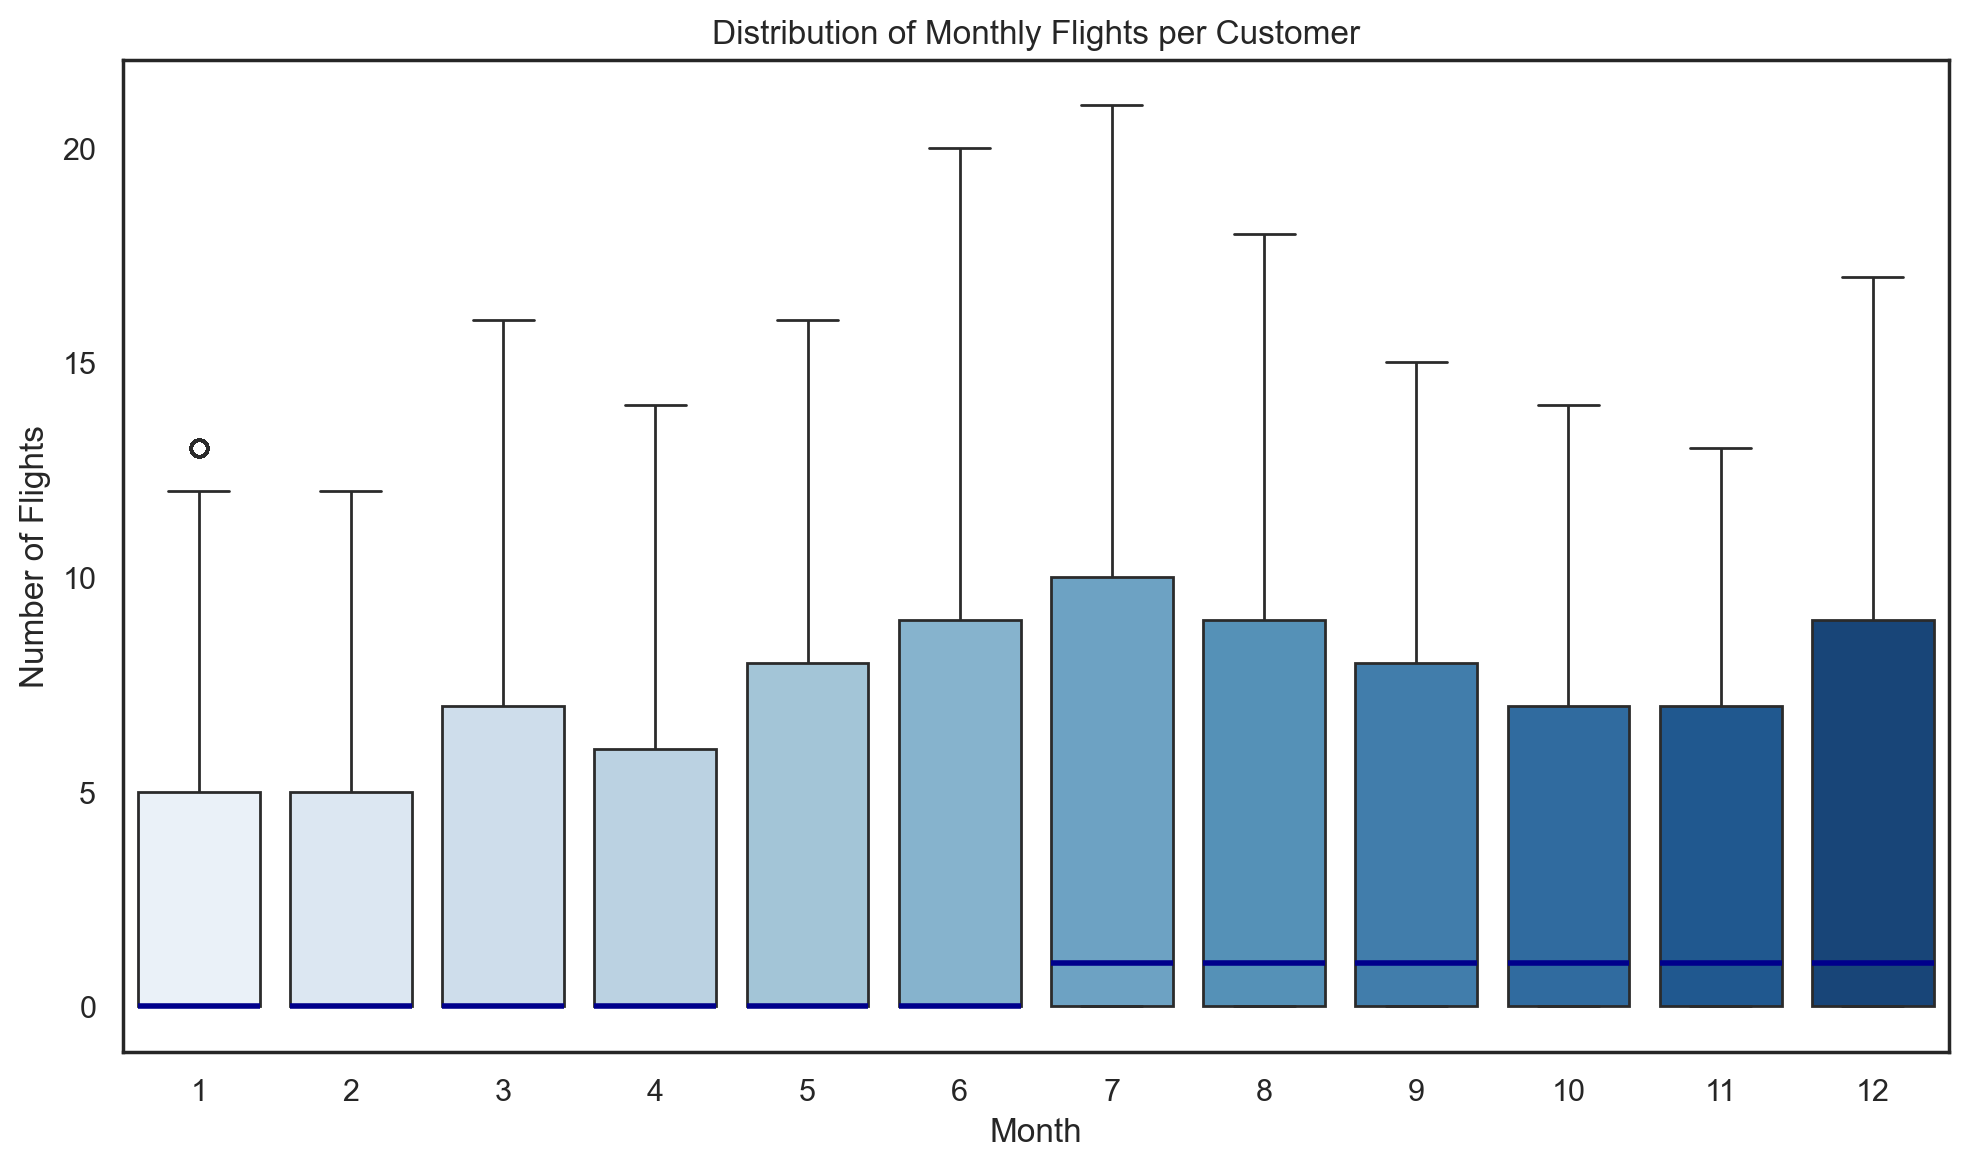

In [164]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Month", y="NumFlights", data=flightsDB, palette="Blues", medianprops={"color": "darkblue", "linewidth": 2})
plt.title("Distribution of Monthly Flights per Customer")
plt.xlabel("Month")
plt.ylabel("Number of Flights")
plt.tight_layout()
plt.show()

The boxplot reveals a clear seasonal trend in flight frequency, with higher median values and wider variability during the second part of the year, particularly starting in July until December which likely correspond to peak travel seasons.
In contrast, the first part of the year shows lower flight activity, indicating a slower travel period.

Overall, these results confirm that flight activity is not uniformly distributed throughout the year and that seasonality plays an important role in customer travel behavior, an aspect that can later be integrated into segmentation and marketing strategy development.

### **Average Number of Flights per Customer by Year (Bar Plot)**

This bar plot presents the average number of flights per customer aggregated by year.
It provides a clear overview of the long-term trend in flight activity, showing whether the overall number of flights per customer is increasing or decreasing over time.
The results highlight possible shifts in customer engagement or external factors (such as market changes or economic conditions) affecting yearly travel frequency.

/var/folders/s9/nfpy2jls4ps2k_p8lpjz6_yr0000gn/T/ipykernel_66399/878023142.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Year", y="NumFlights", data=flightsDB_year, palette="Blues_d")


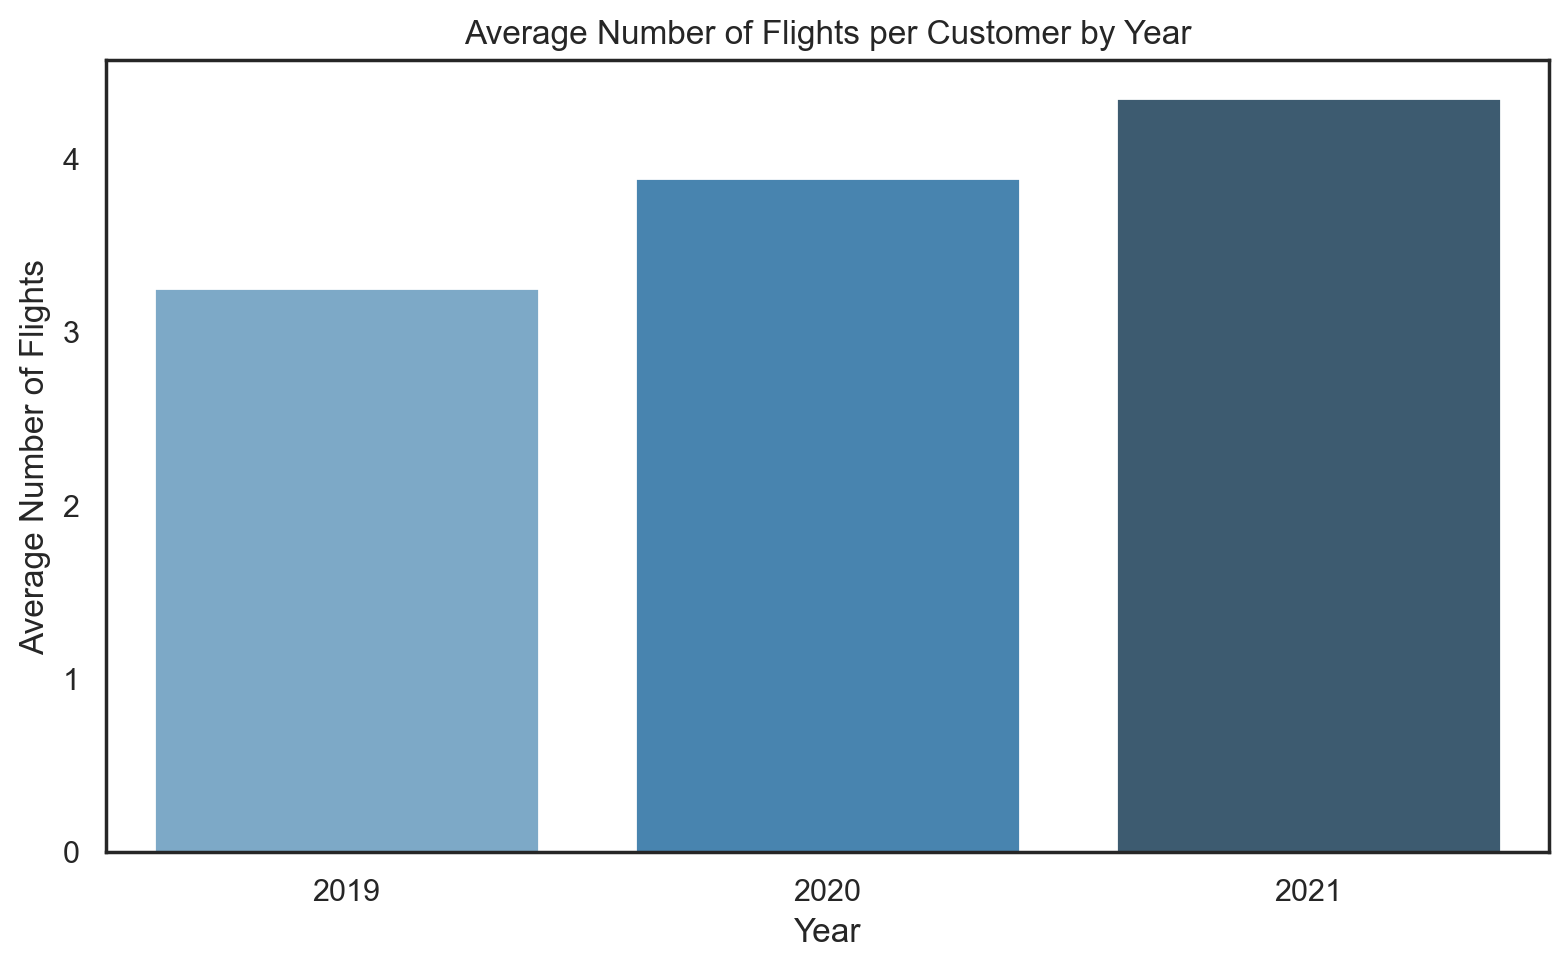

In [165]:
# we start by saving the average number of flights per customer by year in a new dataframe
flightsDB_year = flightsDB.groupby("Year", as_index=False)["NumFlights"].mean()

plt.figure(figsize=(8,5))
sns.barplot(x="Year", y="NumFlights", data=flightsDB_year, palette="Blues_d")
plt.title("Average Number of Flights per Customer by Year")
plt.xlabel("Year")
plt.ylabel("Average Number of Flights")
plt.tight_layout()
plt.show()

The results indicate a steady increase in the average number of flights per customer from 2019 to 2021.
This upward trend suggests that, over the analyzed period, customers became more active and engaged with the airline, taking more flights on average each year.
Such growth may reflect the company’s successful loyalty initiatives, increased route availability, or gradual recovery and expansion of air travel demand following market fluctuations. This can be an important indicator of loyalty and potential value in future segmentation analyses.

### **Year vs. Month Heatmap of Average Flights**

The heatmap combines both yearly and monthly perspectives, showing the average number of flights per customer across different months and years.
This visualization allows for the quick identification of seasonal peaks and year-to-year variations, helping to reveal how travel patterns evolve over time.
The observed patterns confirm the presence of recurring high-activity months, as well as gradual changes across years, suggesting evolving customer travel behavior.

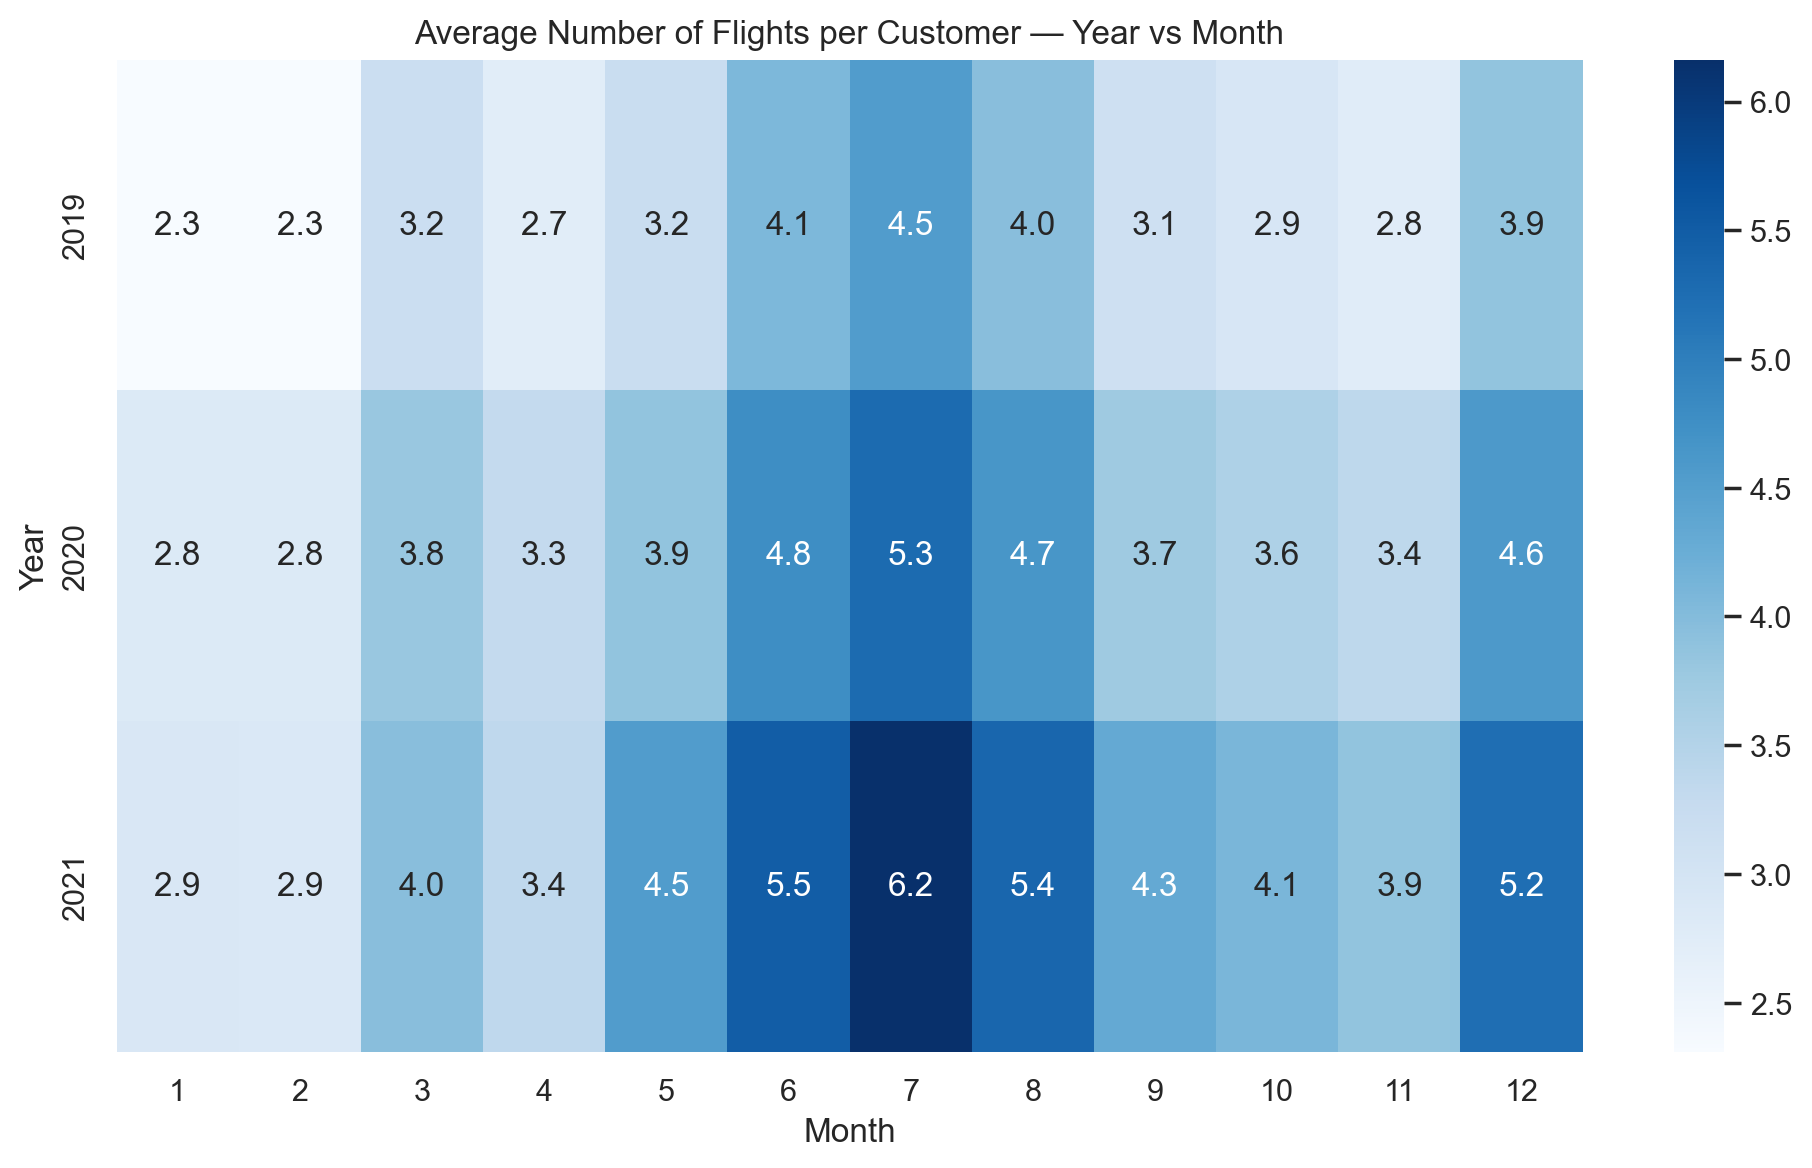

In [166]:
# We start creating the pivot table to use in the heatmap
flights_pivot = flightsDB.pivot_table( index="Year", columns="Month",
                                       values="NumFlights", aggfunc="mean")

plt.figure(figsize=(10,6))
sns.heatmap(flights_pivot, cmap="Blues", annot=True, fmt=".1f")
plt.title("Average Number of Flights per Customer — Year vs Month")
plt.xlabel("Month")
plt.ylabel("Year")
plt.tight_layout()
plt.show()

The heatmap clearly highlights both seasonal and yearly growth patterns in flight activity.
Across all three years, July consistently shows the highest average number of flights per customer, confirming it as the main peak travel month.
The summer months (June until August) display the most intense travel activity overall, while the beginning of the year record significantly lower averages.

In addition and in the same way as the previous graph, there is a noticeable increase in flight frequency over time, with 2021 showing higher monthly averages across nearly all months compared to 2019 and 2020.
This indicates a steady recovery and expansion in customer engagement, reflecting both growing travel demand and potentially more active participation in AIAI’s loyalty program.

### **Area Plot - Monthly Evolution of Points Accumulated and Redeemed**

This area plot displays the monthly evolution of points accumulated and redeemed by customers, offering a clear view of loyalty program activity over time. By aggregating data at a monthly level, it allows the identification of patterns and seasonal variations in customer engagement with the program.

<Axes: xlabel='YearMonthDate'>

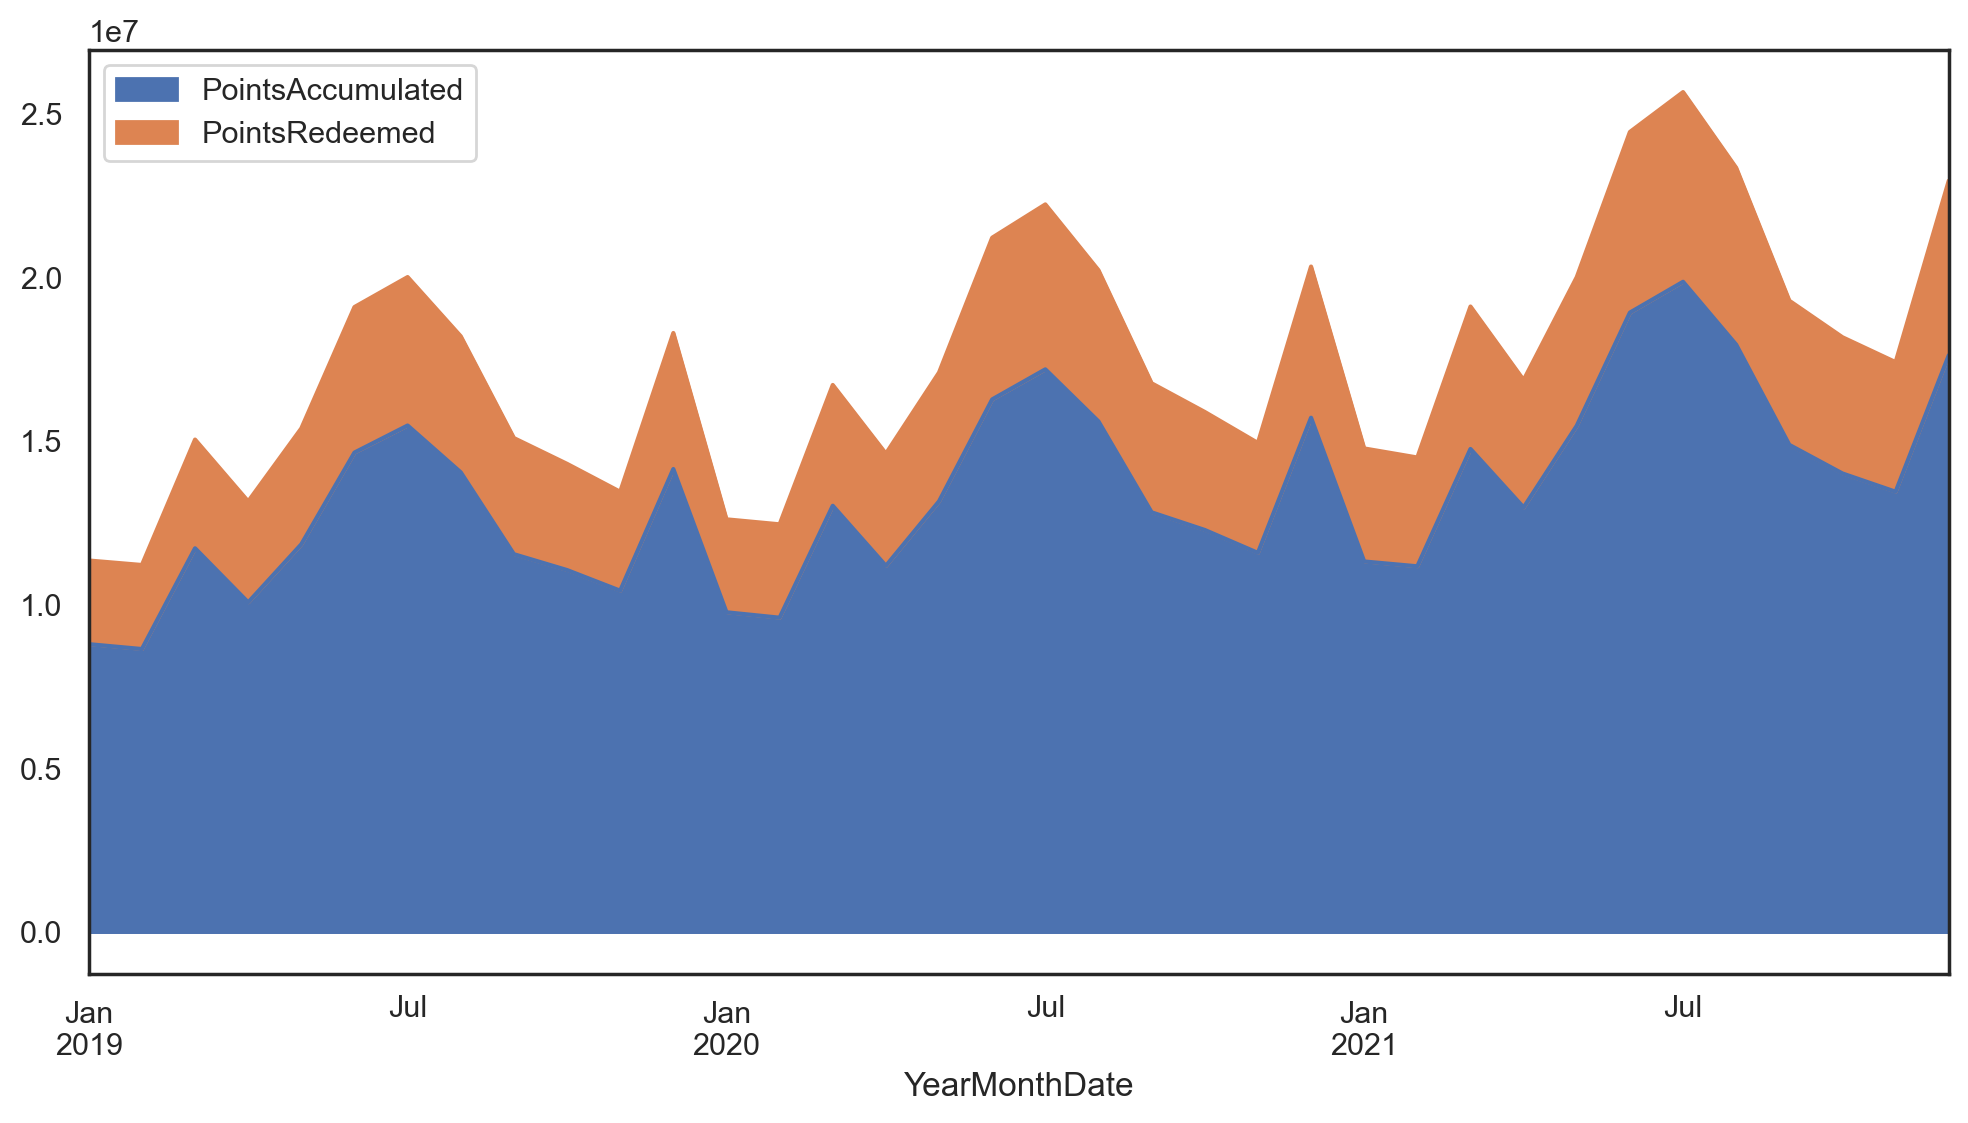

In [168]:
flightsDB.groupby('YearMonthDate')[['PointsAccumulated', 'PointsRedeemed']].sum().plot.area(figsize=(12,6))

The plot reveals that redeemed points consistently exceed accumulated points, indicating that customers are actively using their loyalty rewards rather than simply accumulating them. Once more, peaks in redemption and accumulation activity align with mid-year and end-of-year periods, suggesting strong travel demand during these times and reflecting the program’s effectiveness in driving repeat engagement through reward utilization.

# Interactive EDA Dashboard

In [189]:
# streamlit run app.py --server.headless true 
# Enter this into the terminal to get the dashboard link

## Prerequisit Files

First we need to create .py files to load the data and import the plots.

In [184]:
%%writefile requirements.txt
streamlit
pandas
matplotlib
seaborn
fastcore


Overwriting requirements.txt


Write data loader file

In [185]:
%%writefile data_loader.py
import pandas as pd
import os

def load_data():
    """Load FlightsDB, CustomerDB and Metadata CSVs with correct paths."""

    FILE_DIR = os.path.dirname(__file__)  # Folder where this .py file exists
    DATA_DIR = os.path.join(FILE_DIR, "data")  # Data folder next to app.py

    # Build reliable absolute paths
    flights_path = os.path.join(DATA_DIR, "DM_AIAI_FlightsDB.csv")
    customer_path = os.path.join(DATA_DIR, "DM_AIAI_CustomerDB.csv")
    metadata_path = os.path.join(DATA_DIR, "DM_AIAI_Metadata.csv")

    # Load CSVs
    flightsDB = pd.read_csv(flights_path, sep=",", index_col="Loyalty#")
    customerDB = pd.read_csv(customer_path, sep=",", index_col="Loyalty#")
    metaData = pd.read_csv(metadata_path, sep=";", header=None)

    # Feature lists
    non_metric_features_FDB = ["YearMonthDate"]
    metric_features_FDB = flightsDB.columns.drop(non_metric_features_FDB).to_list()
    continuous_FDB = ["DistanceKM", "PointsAccumulated", "PointsRedeemed", "DollarCostPointsRedeemed"]

    metric_features_CDB = customerDB.select_dtypes(include=['number']).columns.tolist()
    continuous_CDB = ["Latitude", "Longitude", "Income", "Customer Lifetime Value"]
    non_metric_features_CDB = customerDB.columns.drop(metric_features_CDB).to_list()

    return (
        flightsDB, customerDB, metaData,
        non_metric_features_FDB, metric_features_FDB, continuous_FDB,
        metric_features_CDB, continuous_CDB, non_metric_features_CDB
    )


Overwriting data_loader.py


Write a file with all the graph functions we will be using on the dashboard.

In [186]:
%%writefile graph_functions.py
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
import numpy as np
import pandas as pd

def boxplots_CDB(df: pd.DataFrame, features: list, rows: int = 2, figsize=(20, 10)):
    """
    Create a matplotlib Figure containing boxplots for the given features from df.
    - df: customer dataframe
    - features: list of numeric feature names to plot
    - rows: preferred number of rows (function will compute columns automatically)
    Returns: matplotlib.figure.Figure
    """
    if not features:
        raise ValueError("No features provided for boxplots.")

    n = len(features)
    cols = ceil(n / rows)

    sns.set_style("white")
    fig, axes = plt.subplots(rows, cols, figsize=figsize, constrained_layout=True)
    fig.set_constrained_layout_pads(h_pad=.2)

    # Flatten axes to iterate easily
    if hasattr(axes, "flatten"):
        axes_list = axes.flatten()
    else:
        axes_list = [axes]

    # Hide extra axes if any
    for ax in axes_list[n:]:
        ax.set_visible(False)

    for ax, feat in zip(axes_list, features):
        if feat not in df.columns:
            ax.set_visible(False)
            continue

        data = df[feat].dropna().reset_index(drop=True)
        if data.empty:
            ax.set_visible(False)
            continue

        sns.boxplot(
            x=data,
            ax=ax,
            color="#0062FF",
            boxprops=dict(edgecolor="black"),
            whiskerprops=dict(color="black"),
            capprops=dict(color="black"),
            medianprops=dict(color="black", linewidth=3),
            flierprops=dict(markeredgecolor="black")
        )

        ax.grid(True, linestyle="--", alpha=0.4)
        ax.set_title(feat, fontsize=18)
        ax.set_xlabel("")

    plt.suptitle("Metric Variables' Box Plots", fontsize=25, fontweight="bold")
    return fig


def location_scatter_CDB(df: pd.DataFrame, lon_col: str = "Longitude", lat_col: str = "Latitude",
                         show_trend: bool = True, figsize=(10, 6)):
    """
    Scatter plot of Longitude vs Latitude using ALL available points.
    - df: dataframe
    - lon_col, lat_col: column names for longitude & latitude
    - show_trend: whether to fit and show a linear trend line
    Returns: matplotlib.figure.Figure
    """
    if lon_col not in df.columns or lat_col not in df.columns:
        raise KeyError(f"Missing coordinates: expected '{lon_col}' and '{lat_col}' in dataframe.")

    coords = df[[lon_col, lat_col]].dropna()
    if coords.empty:
        raise ValueError("No coordinate data available for scatter plot.")

    x = coords[lon_col].values
    y = coords[lat_col].values

    sns.set_style("white")
    fig, ax = plt.subplots(figsize=figsize)
    ax.scatter(x, y, s=25, alpha=0.3, c='blue', edgecolor='k', linewidth=0.3)

    # Trend line if requested and we have variation
    try:
        if show_trend and len(x) >= 2 and np.nanstd(x) > 0 and np.nanstd(y) > 0:
            coeffs = np.polyfit(x, y, 1)
            trend = np.poly1d(coeffs)
            sort_idx = np.argsort(x)
            ax.plot(x[sort_idx], trend(x[sort_idx]), color='red', linewidth=2)
    except Exception:
        pass

    ax.set_title("Customer Locations", fontsize=18, fontweight='bold')
    ax.set_xlabel("Longitude", fontsize=14, labelpad=12)
    ax.set_ylabel("Latitude", fontsize=14, labelpad=12)
    ax.grid(True, alpha=0.2)
    fig.tight_layout()
    return fig


Overwriting graph_functions.py


Install streamlit

In [187]:
!pip install streamlit streamlit-jupyter


## Write Streamlit Dashboard

Write main streamlit file: app.py

In [188]:
%%writefile app.py
import streamlit as st
st.set_page_config(layout="wide")

import pandas as pd
import numpy as np
from data_loader import load_data
from graph_functions import boxplots_CDB, location_scatter_CDB


if st.session_state.get("__filters_cleared__", False):
    # Reset the flag
    st.session_state["__filters_cleared__"] = False
    # Streamlit will rerun and recreate widgets properly
    st.experimental_rerun()

# -------------------------
# Utility helpers
# -------------------------
def clear_all_filters():
    """Reset all filters safely."""
    for key in list(st.session_state.keys()):
        if key.startswith("C_") or key.startswith("F_"):
            # Multiselects: empty list
            if "Date" not in key:
                st.session_state[key] = []
            # Sliders: None
            else:
                st.session_state[key] = None

    # Additionally, for numeric sliders, reset to None so safe_slider uses full range
    for key in st.session_state.keys():
        if key.startswith("F_") and key not in ["F_Date"]:
            st.session_state[key] = None
        if key.startswith("C_") and "Date" not in key:
            st.session_state[key] = []



def safe_slider(label, min_val, max_val, key=None):
    """Create a slider safely. Handles session_state None values."""
    
    # Validate min/max
    if min_val is None or max_val is None or pd.isna(min_val) or pd.isna(max_val):
        st.sidebar.write(f"⚠️ Not enough data to filter `{label}`")
        return None

    try:
        imin, imax = float(min_val), float(max_val)
    except Exception:
        st.sidebar.write(f"⚠️ Cannot create slider for `{label}`")
        return None

    if imin >= imax:
        st.sidebar.write(f"⚠️ Not enough variation to filter `{label}`")
        return None

    # Retrieve current value from session_state
    val = st.session_state.get(key)

    # If val is invalid or contains None, reset to full range
    if (
        val is None
        or not isinstance(val, (tuple, list))
        or len(val) != 2
        or val[0] is None
        or val[1] is None
    ):
        val = (imin, imax)

    # Ensure both entries are floats
    try:
        val = (float(val[0]), float(val[1]))
    except Exception:
        val = (imin, imax)

    # Update session_state so next render uses this valid value
    st.session_state[key] = val

    return st.sidebar.slider(label, imin, imax, val, key=key)





# -------------------------
# Load data
# -------------------------
(
    flightsDB, customerDB, metaData,
    non_metric_features_FDB, metric_features_FDB, continuous_FDB,
    metric_features_CDB, continuous_CDB, non_metric_features_CDB
) = load_data()

# Remove Unnamed: 0 globally if present
if "Unnamed: 0" in customerDB.columns:
    customerDB.drop(columns=["Unnamed: 0"], inplace=True)

# -------------------------
# Sidebar navigation
# -------------------------
st.sidebar.title("📌 Navigation")
page = st.sidebar.radio("Go to:", ["Customer Explorer", "Flights Explorer", "Insights & Graphs"])

# -------------------------
# PAGE: Customer Explorer
# -------------------------
# At the very top of Customer Explorer page
st.session_state["__customer_df__"] = customerDB.copy()
df = st.session_state["__customer_df__"]

if page == "Customer Explorer":
    st.title("👤 Customer Database Explorer")
    df = customerDB.copy()

    st.sidebar.subheader("Filters")
    if st.sidebar.button("Clear All Filters"):
        clear_all_filters()

    # Convert date columns
    for date_col in ["EnrollmentDateOpening", "CancellationDate"]:
        if date_col in df.columns:
            df[date_col] = pd.to_datetime(df[date_col], errors="coerce")

    # Date filters
    for col, label in [("EnrollmentDateOpening", "Enrollment Date"), ("CancellationDate", "Cancellation Date")]:
        if col in df.columns:
            min_d, max_d = df[col].min(), df[col].max()
            if not pd.isna(min_d) and not pd.isna(max_d):
                # Use session_state to detect user selection
                ss_key = f"C_{col}"

                # Initialize session_state on first run
                if ss_key not in st.session_state:
                    st.session_state[ss_key] = None  # no filter applied yet

                # Show date input with current session_state or empty
                date_range = st.sidebar.date_input(
                    label,
                    value=st.session_state[ss_key] or (min_d.date(), max_d.date()),
                    key=ss_key
                )

                # Only filter df if user has changed the dates
                if date_range and isinstance(date_range, (list, tuple)) and len(date_range) == 2:
                    # Only filter if session_state has a value different from None
                    if st.session_state[ss_key] is not None:
                        start = pd.to_datetime(date_range[0])
                        end = pd.to_datetime(date_range[1])
                        df = df[df[col].between(start, end)]


    # Dropdown filters
    filter_cols = {
        "City": "City",
        "Province or State": "Province or State",
        "Gender": "Gender",
        "Education": "Education",
        "Location Code": "Location Code",
        "Marital Status": "Marital Status",
        "Loyalty Status": "LoyaltyStatus",
        "Enrollment Type": "EnrollmentType"
    }

    # Dropdown filters
    for label, col in filter_cols.items():
        if col in df.columns:
            opts = df[col].dropna().unique()
            opts = sorted(opts.tolist()) if opts is not None else []

            # Get stored selection, default to empty list
            ss_key = f"C_{col}"
            sel_default = st.session_state.get(ss_key, [])

            # Only keep defaults that exist in options
            sel_default = [v for v in sel_default if v in opts]

            # Save back to session_state
            st.session_state[ss_key] = sel_default

            sel = st.sidebar.multiselect(
                label,
                options=opts,
                default=sel_default,
                key=ss_key
            )

            if sel:
                df = df[df[col].isin(sel)]




    # Numeric sliders
    # Income slider
    if "Income" in df.columns:
        rng = safe_slider("Income", df["Income"].min(), df["Income"].max(), key="C_Income")
        if rng is None or len(rng) != 2:
            rng = (df["Income"].min(), df["Income"].max())
        df = df[df["Income"].between(rng[0], rng[1])]

    # Customer Lifetime Value slider
    if "Customer Lifetime Value" in df.columns:
        rng = safe_slider("Customer Lifetime Value", df["Customer Lifetime Value"].min(), df["Customer Lifetime Value"].max(), key="C_CLV")
        if rng is None or len(rng) != 2:
            rng = (df["Customer Lifetime Value"].min(), df["Customer Lifetime Value"].max())
        df = df[df["Customer Lifetime Value"].between(rng[0], rng[1])]




    # Empty check
    if df.empty:
        st.warning("⚠️ No records match your filters. Clear filters or broaden your selection.")
        st.stop()

    # ---------- KPI cards (Customer)
    kpi1, kpi2 = st.columns(2)
    total_clv = df["Customer Lifetime Value"].sum() if "Customer Lifetime Value" in df.columns else np.nan
    city_mode = df["City"].mode().iloc[0] if ("City" in df.columns and not df["City"].dropna().empty) else "—"
    kpi1.metric("Total Customer Lifetime Value", f"{total_clv:,.0f}")
    kpi2.metric("Most common City", f"{city_mode}")

    st.markdown("### Filtered Customer Data")
    st.dataframe(df, use_container_width=True, height=700)

    csv = df.to_csv(index=False).encode("utf-8")
    st.download_button("Download filtered data (CSV)", data=csv, file_name="filtered_customers.csv", mime="text/csv")

# -------------------------
# PAGE: Flights Explorer
# -------------------------
elif page == "Flights Explorer":
    st.title("✈️ Flight Records Explorer")
    df = flightsDB.copy()

    st.sidebar.subheader("Filters")
    if st.sidebar.button("Clear All Filters"):
        clear_all_filters()

    # Date filter
    if "YearMonthDate" in df.columns:
        df["YearMonthDate"] = pd.to_datetime(df["YearMonthDate"], errors="coerce")
        min_d, max_d = df["YearMonthDate"].min(), df["YearMonthDate"].max()
        if not pd.isna(min_d) and not pd.isna(max_d):
            date_range = st.sidebar.date_input("Year / Month", (min_d.date(), max_d.date()), key="F_Date")
            if isinstance(date_range, (list, tuple)) and len(date_range) == 2:
                df = df[df["YearMonthDate"].between(pd.to_datetime(date_range[0]), pd.to_datetime(date_range[1]))]

    # Numeric sliders
    slider_cols = [
        "NumFlights",
        "NumFlightsWithCompanions",
        "DistanceKM",
        "PointsAccumulated",
        "PointsRedeemed",
        "DollarCostPointsRedeemed"
    ]
    for col in slider_cols:
        if col in df.columns:
            rng = safe_slider(col, df[col].min(), df[col].max(), key=f"F_{col}")
            if rng is not None:
                df = df[df[col].between(rng[0], rng[1])]

    if df.empty:
        st.warning("⚠️ No flight records match your filters. Clear filters or broaden your selection.")
        st.stop()

    # KPI cards (Flights)
    f1, f2 = st.columns(2)
    total_accum = int(df["PointsAccumulated"].sum()) if "PointsAccumulated" in df.columns else 0
    total_redeemed = int(df["PointsRedeemed"].sum()) if "PointsRedeemed" in df.columns else 0

    f1.metric("Total Points Accumulated", f"{total_accum:,}")
    f2.metric("Total Points Redeemed", f"{total_redeemed:,}")

    st.markdown("### Filtered Flight Data")
    st.dataframe(df, use_container_width=True, height=700)

    csv = df.to_csv(index=False).encode("utf-8")
    st.download_button("Download filtered data (CSV)", data=csv, file_name="filtered_flights.csv", mime="text/csv")

# -------------------------
# PAGE: Insights & Graphs
# -------------------------
elif page == "Insights & Graphs":
    st.title("📊 Customer Insights Dashboard")

    st.sidebar.subheader("Insights Controls (CustomerDB)")

    # Numeric metric selection
    available_metrics = [c for c in metric_features_CDB if c in customerDB.columns]
    if not available_metrics:
        st.warning("No numeric features found in CustomerDB for plotting.")
    else:
        selected = st.sidebar.multiselect(
            "Select metric features to plot (boxplots)",
            options=available_metrics,
            default=available_metrics[:8]
        )
        if selected:
            try:
                fig_box = boxplots_CDB(customerDB, selected)
                st.pyplot(fig_box)
            except Exception as e:
                st.error(f"Failed to build boxplots: {e}")

    # Location scatter
    st.sidebar.markdown("---")
    show_location = st.sidebar.checkbox("Show customer location scatter", value=True)
    show_trend = st.sidebar.checkbox("Show trend line on location scatter", value=False)

    if show_location:
        if ("Longitude" in customerDB.columns) and ("Latitude" in customerDB.columns):
            try:
                fig_loc = location_scatter_CDB(customerDB, lon_col="Longitude", lat_col="Latitude", show_trend=show_trend)
                st.pyplot(fig_loc)
            except Exception as e:
                st.error(f"Failed to draw location scatter: {e}")
        else:
            st.info("Longitude/Latitude columns not found in CustomerDB; cannot display location scatter.")

Overwriting app.py
